In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_path="/content/drive/MyDrive/aivlepjt/bigpjt/practice/falling/ScienceDirect_files_26Jun2024_04-54-25.362/Data/Fall"

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.fftpack import fft
from scipy.stats import median_abs_deviation
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder

from joblib import dump, load
from keras.models import load_model

In [4]:
pd.set_option('display.max_columns', 40)

In [ ]:
file_path="/content/drive/MyDrive/aivlepjt/bigpjt/practice/falling/ScienceDirect_files_26Jun2024_04-54-25.362/Data/Fall/Backward/LyingRecovery/FileTXT/S1_1.txt"

title=['Time(s)', 'acc_x(g)', 'acc_y(g)', 'acc_z(g)', \
       'gyr_x(deg/s)', 'gyr_y(deg/s)', 'gyr_z(deg/s)', \
       'mag_x(G)', 'mag_y(G)', 'mag_z(G)', 'SVM_acc(g)', \
       'yaw(deg)', 'pitch(deg)', 'roll(deg)']

# Read the rest of the file as a DataFrame
df = pd.read_csv(file_path, delimiter=';', skiprows=1, names=title, encoding='ISO-8859-1')  # Adjust encoding if needed

# Display the first few rows of the DataFrame
# df.head(100)
df.iloc[80:120]

,Time(s),acc_x(g),acc_y(g),acc_z(g),gyr_x(deg/s),gyr_y(deg/s),gyr_z(deg/s),mag_x(G),mag_y(G),mag_z(G),SVM_acc(g),yaw(deg),pitch(deg),roll(deg)
80,2.397,-0.37,0.23,0.89,-10.30,-96.35,-1.67,-77.87,-110.26,-378.0,0.99,142.02,-13.52,12.19
81,2.427,-0.35,0.13,0.85,-14.12,-105.25,5.50,-84.86,-126.55,-379.0,0.93,142.11,-10.62,11.83
82,2.457,-0.28,0.15,0.80,-11.83,-106.30,-0.35,-85.86,-143.81,-379.0,0.86,142.56,-7.64,11.45
83,2.487,-0.26,0.17,0.77,-14.19,-114.37,0.28,-93.84,-160.11,-377.0,0.83,142.97,-4.59,11.11
84,2.517,-0.10,0.17,0.73,-17.18,-109.63,1.53,-96.84,-193.67,-372.0,0.76,143.26,-1.47,10.69
85,2.548,-0.17,0.14,0.63,-17.74,-117.84,7.51,-100.83,-215.72,-372.0,0.67,143.39,1.88,10.23
86,2.578,-0.14,0.07,0.55,-26.50,-125.08,4.17,-102.83,-232.02,-365.0,0.57,143.36,5.35,9.64
87,2.608,-0.18,0.04,0.48,-37.08,-129.53,-1.74,-109.82,-255.99,-353.0,0.51,143.37,8.73,8.66
88,2.639,-0.07,0.10,0.45,-40.21,-133.08,2.30,-127.79,-291.46,-341.0,0.47,143.38,12.48,7.52
89,2.669,-0.12,0.15,0.46,-42.09,-129.67,6.12,-132.78,-309.67,-327.0,0.50,143.19,16.13,6.45


In [5]:
def calculate_features(df):
    # Calculate magnitude of gyroscope
    df['SVM_gyro(g)'] = np.sqrt(df['gyr_x(deg/s)']**2 + df['gyr_y(deg/s)']**2 + df['gyr_z(deg/s)']**2)

    # Calculate rolling statistics
    window_size = 15  # Adjust the window size as needed for 1-second windows
    df['SVM_acc(g)_mean'] = df['SVM_acc(g)'].rolling(window=window_size).mean()
    df['SVM_acc(g)_std'] = df['SVM_acc(g)'].rolling(window=window_size).std()
    df['SVM_acc(g)_median'] = df['SVM_acc(g)'].rolling(window=window_size).median()
    df['SVM_acc(g)_mad'] = df['SVM_acc(g)'].rolling(window=window_size).apply(median_abs_deviation)

    df['SVM_gyro(g)_mean'] = df['SVM_gyro(g)'].rolling(window=window_size).mean()
    df['SVM_gyro(g)_std'] = df['SVM_gyro(g)'].rolling(window=window_size).std()
    df['SVM_gyro(g)_median'] = df['SVM_gyro(g)'].rolling(window=window_size).median()
    df['SVM_gyro(g)_mad'] = df['SVM_gyro(g)'].rolling(window=window_size).apply(median_abs_deviation)

    # Calculate FFT-based features for a specified window size
    def calculate_fft_features(signal):
        signal = np.array(signal)  # Convert Series to numpy array
        fft_values = fft(signal)
        fft_magnitude = np.abs(fft_values)
        return np.mean(fft_magnitude), np.std(fft_magnitude)

    # Apply FFT feature calculation on rolling windows
    df['SVM_acc(g)_fft_mean'] = df['SVM_acc(g)'].rolling(window=window_size).apply(lambda x: calculate_fft_features(x)[0] if len(x) == window_size else np.nan)
    df['SVM_acc(g)_fft_std'] = df['SVM_acc(g)'].rolling(window=window_size).apply(lambda x: calculate_fft_features(x)[1] if len(x) == window_size else np.nan)

    df['SVM_gyro(g)_fft_mean'] = df['SVM_gyro(g)'].rolling(window=window_size).apply(lambda x: calculate_fft_features(x)[0] if len(x) == window_size else np.nan)
    df['SVM_gyro(g)_fft_std'] = df['SVM_gyro(g)'].rolling(window=window_size).apply(lambda x: calculate_fft_features(x)[1] if len(x) == window_size else np.nan)

    # Labeling the rows
    max_svm_time = df['Time(s)'][df['SVM_acc(g)'] == df['SVM_acc(g)'].max()].values[0]

    # Create a new column for the labels
    df['label'] = 0
    df.loc[(df['Time(s)'] >= max_svm_time - 0.25) & (df['Time(s)'] <= max_svm_time + 0.25), 'label'] = 1

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # drop_cols=['acc_x(g)', 'acc_y(g)', 'acc_z(g)', \
    #    'gyr_x(deg/s)', 'gyr_y(deg/s)', 'gyr_z(deg/s)', \
    #    'mag_x(G)', 'mag_y(G)', 'mag_z(G)', \
    #    'yaw(deg)', 'pitch(deg)', 'roll(deg)']
    drop_cols=[
       'mag_x(G)', 'mag_y(G)', 'mag_z(G)', \
       'yaw(deg)', 'pitch(deg)', 'roll(deg)']

    df.drop(columns=drop_cols, inplace=True)

    return df

# df = calculate_features(df)
# df.head()


In [10]:
def calculate_features2(df):
    # Calculate magnitude of gyroscope
    df['SVM_gyro(g)'] = np.sqrt(df['gyr_x(deg/s)']**2 + df['gyr_y(deg/s)']**2 + df['gyr_z(deg/s)']**2)

    # Calculate rolling statistics
    window_size = 15  # Adjust the window size as needed for 1-second windows
    df['SVM_acc(g)_mean'] = df['SVM_acc(g)'].rolling(window=window_size).mean()
    df['SVM_acc(g)_std'] = df['SVM_acc(g)'].rolling(window=window_size).std()
    df['SVM_acc(g)_median'] = df['SVM_acc(g)'].rolling(window=window_size).median()
    df['SVM_acc(g)_mad'] = df['SVM_acc(g)'].rolling(window=window_size).apply(median_abs_deviation)

    df['SVM_gyro(g)_mean'] = df['SVM_gyro(g)'].rolling(window=window_size).mean()
    df['SVM_gyro(g)_std'] = df['SVM_gyro(g)'].rolling(window=window_size).std()
    df['SVM_gyro(g)_median'] = df['SVM_gyro(g)'].rolling(window=window_size).median()
    df['SVM_gyro(g)_mad'] = df['SVM_gyro(g)'].rolling(window=window_size).apply(median_abs_deviation)

    # Calculate FFT-based features for a specified window size
    def calculate_fft_features(signal):
        signal = np.array(signal)  # Convert Series to numpy array
        fft_values = fft(signal)
        fft_magnitude = np.abs(fft_values)
        return np.mean(fft_magnitude), np.std(fft_magnitude)

    # Apply FFT feature calculation on rolling windows
    df['SVM_acc(g)_fft_mean'] = df['SVM_acc(g)'].rolling(window=window_size).apply(lambda x: calculate_fft_features(x)[0] if len(x) == window_size else np.nan)
    df['SVM_acc(g)_fft_std'] = df['SVM_acc(g)'].rolling(window=window_size).apply(lambda x: calculate_fft_features(x)[1] if len(x) == window_size else np.nan)

    df['SVM_gyro(g)_fft_mean'] = df['SVM_gyro(g)'].rolling(window=window_size).apply(lambda x: calculate_fft_features(x)[0] if len(x) == window_size else np.nan)
    df['SVM_gyro(g)_fft_std'] = df['SVM_gyro(g)'].rolling(window=window_size).apply(lambda x: calculate_fft_features(x)[1] if len(x) == window_size else np.nan)

    # Labeling the rows
    max_svm_time = df['Time(s)'][df['SVM_acc(g)'] == df['SVM_acc(g)'].max()].values[0]

    # Create a new column for the labels
    df['label'] = 0
    # df.loc[(df['Time(s)'] >= max_svm_time - 0.5) & (df['Time(s)'] <= max_svm_time + 0.5), 'label'] = 1

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # drop_cols=['acc_x(g)', 'acc_y(g)', 'acc_z(g)', \
    # 'gyr_x(deg/s)', 'gyr_y(deg/s)', 'gyr_z(deg/s)', \
    # 'mag_x(G)', 'mag_y(G)', 'mag_z(G)', \
    # 'yaw(deg)', 'pitch(deg)', 'roll(deg)']
    drop_cols=[
    'mag_x(G)', 'mag_y(G)', 'mag_z(G)', \
    'yaw(deg)', 'pitch(deg)', 'roll(deg)']

    df.drop(columns=drop_cols, inplace=True)
    return df

# df = calculate_features(df)
# df.head()


In [7]:
def load_and_preprocess(file_path):
    title=['Time(s)', 'acc_x(g)', 'acc_y(g)', 'acc_z(g)', \
       'gyr_x(deg/s)', 'gyr_y(deg/s)', 'gyr_z(deg/s)', \
       'mag_x(G)', 'mag_y(G)', 'mag_z(G)', 'SVM_acc(g)', \
       'yaw(deg)', 'pitch(deg)', 'roll(deg)']

    df = pd.read_csv(file_path, delimiter=';', skiprows=1, names=title, encoding='ISO-8859-1')  # Adjust encoding if needed
    df = calculate_features(df)
    return df

In [8]:
def load_and_preprocess2(file_path):
    title=['Time(s)', 'acc_x(g)', 'acc_y(g)', 'acc_z(g)', \
       'gyr_x(deg/s)', 'gyr_y(deg/s)', 'gyr_z(deg/s)', \
       'mag_x(G)', 'mag_y(G)', 'mag_z(G)', 'SVM_acc(g)', \
       'yaw(deg)', 'pitch(deg)', 'roll(deg)']

    df = pd.read_csv(file_path, delimiter=';', skiprows=1, names=title, encoding='ISO-8859-1')  # Adjust encoding if needed
    df = calculate_features2(df)
    return df

In [9]:
def list_subfolders(base_path):
    try:
        # List all items in the base path
        items = os.listdir(base_path)

        # Filter items to include only directories
        subfolders = [item for item in items if os.path.isdir(os.path.join(base_path, item))]

        # Print the names of the subfolders
        return subfolders

    except Exception as e:
        print(f"An error occurred: {e}")

def list_file_paths(base_path):
  try:
      # List all items in the base path
      items = os.listdir(base_path)

      # Filter items to include only files
      files = [item for item in items if os.path.isfile(os.path.join(base_path, item))]

      full_files=[]
      # Print the full paths of the files
      for file in files:
          full_files.append(os.path.join(base_path, file))

      return full_files

  except Exception as e:
      print(f"An error occurred: {e}")

In [11]:
# File paths
file_paths = ['/content/drive/MyDrive/aivlepjt/bigpjt/practice/falling/ScienceDirect_files_26Jun2024_04-54-25.362/Data/Fall/Syncope']

for subpath in list_subfolders(base_path):
  for subpath2 in list_subfolders(os.path.join(base_path, subpath)):
    if subpath!='Syncope':
      file_paths.append((os.path.join(base_path, subpath, subpath2)))

# Load and preprocess each file
dfs_train=[]
dfs_test=[]

for file_path in file_paths:
  files=list_file_paths(os.path.join(file_path, 'FileTXT'))
  n=int(len(files)*0.8)
  for file in files[:n]:
    dfs_train.append(load_and_preprocess(file))
  for file in files[n:]:
    dfs_test.append(load_and_preprocess(file))


In [12]:
len(dfs_train), len(dfs_test)

(251, 66)

In [35]:
dfs_train[0][["gyr_x(deg/s)", "gyr_y(deg/s)", "gyr_z(deg/s)"]]

,gyr_x(deg/s),gyr_y(deg/s),gyr_z(deg/s)
14,-0.21,0.07,-0.14
15,-0.28,1.32,-0.28
16,-0.21,1.46,-0.28
17,-0.14,0.21,-0.63
18,-0.21,-0.28,-0.49
...,...,...,...
250,-6.33,0.70,-8.49
251,-6.82,-1.88,-8.70
252,-4.10,-0.63,-12.38
253,-5.29,5.84,-15.86


In [13]:
dfs_train[0].loc[dfs_train[0]['label']==1].head(30)

,Time(s),acc_x(g),acc_y(g),acc_z(g),gyr_x(deg/s),gyr_y(deg/s),gyr_z(deg/s),SVM_acc(g),SVM_gyro(g),SVM_acc(g)_mean,SVM_acc(g)_std,SVM_acc(g)_median,SVM_acc(g)_mad,SVM_gyro(g)_mean,SVM_gyro(g)_std,SVM_gyro(g)_median,SVM_gyro(g)_mad,SVM_acc(g)_fft_mean,SVM_acc(g)_fft_std,SVM_gyro(g)_fft_mean,SVM_gyro(g)_fft_std,label
74,2.222,-0.30,0.54,1.12,-97.04,-34.71,2.02,1.28,103.080678,0.762667,0.266953,0.69,0.12,53.494528,27.979023,55.205386,20.159188,1.635899,2.654512,140.244003,184.976072,1
75,2.252,-0.42,-0.18,1.22,-93.08,-152.56,-22.33,1.30,180.102940,0.811333,0.294445,0.70,0.17,64.706514,40.861649,58.810081,16.554492,1.621017,2.908609,204.620513,210.499123,1
76,2.282,0.06,-0.10,0.87,-62.12,-154.43,-19.13,0.88,167.551414,0.823333,0.293249,0.71,0.18,74.183436,47.101821,67.640204,18.637649,1.606241,2.965146,225.307910,250.687493,1
77,2.312,0.34,-0.15,0.54,-56.07,-111.79,-4.17,0.66,125.132881,0.822667,0.293634,0.71,0.18,81.183209,46.290960,68.578990,19.576435,1.605046,2.963550,223.729959,280.723257,1
78,2.342,-0.16,0.04,0.67,-81.25,-28.03,76.17,0.69,114.843861,0.822667,0.293634,0.71,0.18,87.516729,43.726764,69.423254,20.420699,1.605046,2.963550,213.430126,310.005916,1
79,2.372,0.25,-0.29,1.02,-56.07,-23.65,15.37,1.09,62.764674,0.854667,0.294954,0.88,0.25,88.020682,43.369880,69.423254,20.420699,1.691956,3.051571,211.442668,312.793629,1
80,2.401,-0.48,-1.00,0.77,-79.30,-60.59,52.10,1.35,112.579075,0.902667,0.313767,0.93,0.24,90.954021,43.448918,75.364573,26.362018,1.753083,3.244549,218.738804,320.424971,1
81,2.431,0.50,-1.85,2.46,-53.36,-110.05,-95.37,3.12,155.092647,1.072667,0.640909,0.96,0.27,97.372858,45.427986,98.018767,30.378563,3.310096,3.471767,237.364013,338.780541,1
82,2.461,1.15,-4.22,4.17,39.10,60.73,-4.10,6.04,72.344681,1.454000,1.406042,1.09,0.21,97.686490,45.223832,98.018767,28.595513,6.388636,4.309806,236.181189,340.574414,1
83,2.491,3.53,2.30,1.42,58.50,-86.54,-294.68,4.45,312.646324,1.715333,1.576052,1.13,0.22,113.901361,70.760067,103.080678,40.316004,6.323745,6.238666,357.768647,369.732629,1


In [14]:
dfs_train[0].loc[dfs_train[0]['label']==0].head(30)

,Time(s),acc_x(g),acc_y(g),acc_z(g),gyr_x(deg/s),gyr_y(deg/s),gyr_z(deg/s),SVM_acc(g),SVM_gyro(g),SVM_acc(g)_mean,SVM_acc(g)_std,SVM_acc(g)_median,SVM_acc(g)_mad,SVM_gyro(g)_mean,SVM_gyro(g)_std,SVM_gyro(g)_median,SVM_gyro(g)_mad,SVM_acc(g)_fft_mean,SVM_acc(g)_fft_std,SVM_gyro(g)_fft_mean,SVM_gyro(g)_fft_std,label
14,0.422,-0.35,0.10,0.79,-0.21,0.07,-0.14,0.87,0.261916,0.900000,0.023905,0.90,0.01,0.967053,0.400492,0.888200,0.102452,0.977349,3.347057,2.212143,3.373399,0
15,0.452,-0.38,0.11,0.82,-0.28,1.32,-0.28,0.91,1.378115,0.900000,0.023905,0.90,0.01,0.950210,0.375092,0.888200,0.102452,0.977349,3.347057,2.138250,3.307731,0
16,0.482,-0.38,0.11,0.83,-0.21,1.46,-0.28,0.92,1.501366,0.904000,0.021647,0.91,0.01,0.935257,0.345255,0.888200,0.102452,0.965451,3.366408,2.008467,3.279552,0
17,0.512,-0.38,0.10,0.81,-0.14,0.21,-0.63,0.90,0.678675,0.902667,0.021202,0.90,0.01,0.928119,0.349646,0.888200,0.152472,0.965481,3.360989,2.024287,3.245745,0
18,0.543,-0.35,0.12,0.82,-0.21,-0.28,-0.49,0.90,0.602163,0.902000,0.021112,0.90,0.01,0.905306,0.359534,0.888200,0.200790,0.965234,3.358366,2.003243,3.176541,0
19,0.573,-0.37,0.11,0.79,-0.14,0.90,-0.70,0.88,1.148738,0.901333,0.021668,0.90,0.01,0.923230,0.364839,0.888200,0.209525,0.966999,3.355222,2.089615,3.206604,0
20,0.602,-0.38,0.11,0.79,0.28,1.39,-0.90,0.88,1.679434,0.902000,0.020771,0.90,0.01,0.976533,0.413249,0.939149,0.260473,0.964746,3.358477,2.105704,3.501587,0
21,0.633,-0.38,0.10,0.78,0.00,-0.14,-0.35,0.87,0.376962,0.900000,0.022361,0.90,0.02,0.908846,0.423319,0.888200,0.260538,0.973385,3.348062,2.261174,3.128241,0
22,0.663,-0.37,0.13,0.80,0.00,0.49,0.00,0.89,0.490000,0.896667,0.019518,0.90,0.01,0.868913,0.433247,0.888200,0.286038,0.962079,3.337650,2.157481,3.049307,0
23,0.693,-0.37,0.13,0.84,-0.42,1.88,0.00,0.93,1.926344,0.898000,0.021112,0.90,0.02,0.938123,0.512262,0.888200,0.398200,0.968179,3.341396,2.512908,3.249645,0


In [15]:
# File paths
file_paths = ['/content/drive/MyDrive/aivlepjt/bigpjt/practice/falling/ScienceDirect_files_26Jun2024_04-54-25.362/Data/Fall/Syncope']

for subpath in list_subfolders(base_path):
  for subpath2 in list_subfolders(os.path.join(base_path, subpath)):
    if subpath!='Syncope':
      file_paths.append((os.path.join(base_path, subpath, subpath2)))

# Load and preprocess each file
dfs_train_name={}
dfs_test_name={}

step_train=0
step_test=0
for file_path in file_paths:
  files=list_file_paths(os.path.join(file_path, 'FileTXT'))
  n=int(len(files)*0.8)
  for idx, file in enumerate(files[:n]):
    dfs_train_name[idx+step_train]=file.split('Fall/')[1].split('.txt')[0].replace('/FileTXT/', '_').replace('/', '_')
  for idx, file in enumerate(files[n:]):
    dfs_test_name[idx+step_test]=file.split('Fall/')[1].split('.txt')[0].replace('/FileTXT/', '_').replace('/', '_')
  step_train+=n
  step_test+=len(files)-n


In [ ]:
train_csv_path = '/content/drive/MyDrive/aivlepjt/bigpjt/practice/refined_data/train/'
test_csv_path = '/content/drive/MyDrive/aivlepjt/bigpjt/practice/refined_data/test/'

step=0
for idx, df_train in enumerate(dfs_train):
  df_train.to_csv(train_csv_path+dfs_train_name[idx]+'.csv', index=False)

for idx, df_test in enumerate(dfs_test):
  df_test.to_csv(test_csv_path+dfs_test_name[idx]+'.csv', index=False)

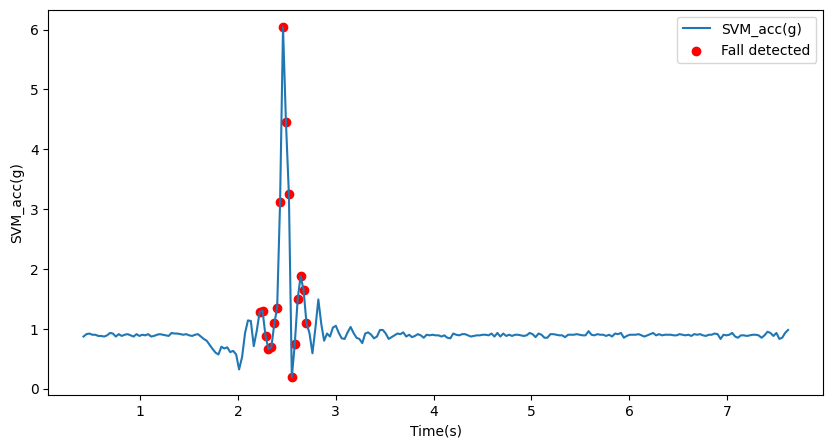

In [16]:
df=dfs_train[0]
# Plot SVM_acc(g) with labels
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Time(s)', y='SVM_acc(g)', label='SVM_acc(g)')
plt.scatter(df['Time(s)'][df['label'] == 1], df['SVM_acc(g)'][df['label'] == 1], color='red', label='Fall detected')
plt.legend()
plt.show()

# Plot pitch and roll with labels
# plt.figure(figsize=(10, 5))
# sns.lineplot(data=df, x='Time(s)', y='pitch(deg)', label='Pitch(deg)')
# sns.lineplot(data=df, x='Time(s)', y='roll(deg)', label='Roll(deg)')
# plt.scatter(df['Time(s)'][df['label'] == 1], df['pitch(deg)'][df['label'] == 1], color='red', label='Fall detected (Pitch)')
# plt.scatter(df['Time(s)'][df['label'] == 1], df['roll(deg)'][df['label'] == 1], color='red', label='Fall detected (Roll)')
# plt.legend()
# plt.show()

In [17]:
df=dfs_train[0]
# Extract features and labels
features = df.drop(columns=['Time(s)', 'label'])
labels = df['label']

# Normalize features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Split the data into training and testing sets without shuffling
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.2, shuffle=False)

# Ensure the number of samples is divisible by time_steps
time_steps = 15  # Adjust as necessary
num_train_samples = (X_train.shape[0] // time_steps) * time_steps
num_test_samples = (X_test.shape[0] // time_steps) * time_steps

X_train = X_train[:num_train_samples]
X_test = X_test[:num_test_samples]
y_train = y_train[:num_train_samples]
y_test = y_test[:num_test_samples]

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = encoder.transform(y_test.values.reshape(-1, 1))

# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.reshape((num_train_samples // time_steps, time_steps, X_train.shape[1]))
X_test = X_test.reshape((num_test_samples // time_steps, time_steps, X_test.shape[1]))

# Remove the time dimension from y_train and y_test, predict one label per sequence
y_train = y_train.reshape((num_train_samples // time_steps, time_steps, -1))[:, 0, :]
y_test = y_test.reshape((num_test_samples // time_steps, time_steps, -1))[:, 0, :]

# Verify the shapes of the arrays
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (12, 15, 20)
X_test shape: (3, 15, 20)
y_train shape: (12, 2)
y_test shape: (3, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(time_steps, features_normalized.shape[1]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))  # Final LSTM layer with return_sequences=False
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))  # Additional Dense layer for better learning
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))  # Additional Dense layer for better learning
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[-1], activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])



In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 64)            21760     
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [20]:
dfs_train_concat=pd.concat(dfs_train, axis=0)
dfs_train_concat.drop(columns=['Time(s)', 'label'], inplace=True)

In [21]:
dfs_train_concat.shape

(71275, 20)

In [22]:
scaler = StandardScaler()
scaler.fit(dfs_train_concat)  # Reshape if needed

StandardScaler()

In [23]:
from joblib import dump, load
dump(scaler, 'scaler_gyro.joblib')

['scaler_gyro.joblib']

In [ ]:
# 파라미터 결정 테스트

# combinations = [
#     {'lstm_units1': 64, 'lstm_units2': 32, 'dense_units1': 48, 'dense_units2': 16, 'dropout_rate': 0.3},
#     {'lstm_units1': 48, 'lstm_units2': 32, 'dense_units1': 32, 'dense_units2': 16, 'dropout_rate': 0.4},
#     {'lstm_units1': 64, 'lstm_units2': 48, 'dense_units1': 48, 'dense_units2': 32, 'dropout_rate': 0.2},
#     {'lstm_units1': 32, 'lstm_units2': 16, 'dense_units1': 32, 'dense_units2': 8, 'dropout_rate': 0.3},
#     {'lstm_units1': 48, 'lstm_units2': 16, 'dense_units1': 16, 'dense_units2': 8, 'dropout_rate': 0.2}
# ]

# results = []
# for idx, comb in enumerate(combinations):
#   lstm_units1=comb['lstm_units1']
#   lstm_units2=comb['lstm_units2']
#   dense_units1=comb['dense_units1']
#   dense_units2=comb['dense_units2']
#   dropout_rate=comb['dropout_rate']
#   model = Sequential()
#   model.add(LSTM(lstm_units1, input_shape=(time_steps, features_normalized.shape[1]), return_sequences=True))
#   model.add(Dropout(dropout_rate))
#   model.add(LSTM(lstm_units2, return_sequences=False))
#   model.add(Dropout(dropout_rate))
#   model.add(Dense(dense_units1, activation='relu'))
#   model.add(Dropout(dropout_rate))
#   model.add(Dense(dense_units2, activation='relu'))
#   model.add(Dropout(dropout_rate))
#   model.add(Dense(y_train.shape[-1], activation='softmax'))

#   model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

#     # Define the batch size and epochs for incremental learning
#   batch_size = 32
#   epochs = 10

#   # Train the model incrementally
#   for i, df in enumerate(dfs_train):
#       print(f"Training on dataset {i + 1}/{len(dfs_train)}")
#       print('data_name: ', dfs_train_name[i])
#       # Extract features and labels
#       X = df.drop(columns=['Time(s)', 'label'])
#       y = df['label']

#       # Normalize features
#       # scaler = StandardScaler()
#       X_normalized = scaler.transform(X)

#       # One-hot encode the labels
#       encoder = OneHotEncoder(sparse_output=False)
#       y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

#       # Ensure the number of samples is divisible by time_steps
#       time_steps = 15
#       num_samples = (X_normalized.shape[0] // time_steps) * time_steps

#       X_final = X_normalized[:num_samples]
#       y_final = y_encoded[:num_samples]

#       # Reshape data for LSTM [samples, time steps, features]
#       X_final = X_final.reshape((num_samples // time_steps, time_steps, X_final.shape[1]))
#       y_final = y_final.reshape((num_samples // time_steps, time_steps, -1))[:, 0, :]

#       # Train the model on the current dataset
#       history = model.fit(X_final, y_final, epochs=epochs, batch_size=batch_size, verbose=1)
#   accuracy = np.max(history.history['accuracy'])
#   loss=np.max(history.history['loss'])
#   results.append((comb, loss, accuracy))
#   # Save the model's architecture and weights
#   model.save(f'hypertune_model{idx}.keras')
# # Print the results
# for comb, loss, accuracy in results:
#     print(f"Combination: {comb} -Loss: {loss:.4f} - Validation Accuracy: {accuracy:.4f}")

In [ ]:
# 파라미터 결정 테스트 생성 모델으로 각각 정확도 검사

# # Evaluate the model incrementally on each test set
# def expand_predictions(y_pred_classes, num_samples, time_steps):
#     expanded_pred = np.repeat(y_pred_classes, time_steps)

#     # If expanded_pred has fewer elements than num_samples, pad with zeros
#     if len(expanded_pred) < num_samples:
#         expanded_pred = np.pad(expanded_pred, (0, num_samples - len(expanded_pred)), 'constant', constant_values=0)

#     return expanded_pred[:num_samples]

# from keras.models import load_model

# results = []
# for i in range(5):
#   # Load the saved model
#   tune_model = load_model(f'hypertune_model{i}.keras')
#   sum_acc_score=0
#   for i, df in enumerate(dfs_test):
#       print(f"Evaluating on test dataset {i + 1}/{len(dfs_test)}")
#       print('data_name: ', dfs_test_name[i])
#       # Extract features and labels
#       X_test = df.drop(columns=['Time(s)', 'label'])
#       y_test = df['label']

#       # Normalize features
#       # scaler = StandardScaler()
#       X_test_normalized = scaler.transform(X_test)

#       # One-hot encode the labels
#       encoder = OneHotEncoder(sparse_output=False)
#       y_test_encoded = encoder.fit_transform(y_test.values.reshape(-1, 1))

#       # Ensure the number of samples is divisible by time_steps
#       num_test_samples = (X_test_normalized.shape[0] // time_steps) * time_steps

#       X_test_final = X_test_normalized[:num_test_samples]
#       y_test_final = y_test_encoded[:num_test_samples]

#       # Reshape data for LSTM [samples, time steps, features]
#       X_test_final = X_test_final.reshape((num_test_samples // time_steps, time_steps, X_test_final.shape[1]))
#       y_test_final = y_test_final.reshape((num_test_samples // time_steps, time_steps, -1))[:, 0, :]

#       # Evaluate the model
#       # loss, accuracy = model.evaluate(X_test_final, y_test_final, verbose=1)
#       # print(f'Test Accuracy on dataset {i + 1}: {accuracy}')

#       # Evaluate the model
#       y_pred = tune_model.predict(X_test_final)
#       y_pred_classes = np.argmax(y_pred, axis=1)
#       y_true = np.argmax(y_test_final, axis=1)

#       # Classification report and confusion matrix
#       sum_acc_score+=accuracy_score(y_true, y_pred_classes)
#       print(accuracy_score(y_true, y_pred_classes))
#       print(classification_report(y_true, y_pred_classes))
#       print(confusion_matrix(y_true, y_pred_classes))

#       # Expand the predicted labels to match the original time steps
#       expanded_y_pred_classes = expand_predictions(y_pred_classes, len(df), time_steps)

#       temp_df=pd.DataFrame({'Time(s)':df['Time(s)'], 'SVM_acc(g)':df['SVM_acc(g)'], 'label':expanded_y_pred_classes})
#       # Plot SVM_acc(g) with labels
#       plt.figure(figsize=(8, 2))
#       sns.lineplot(data=df, x='Time(s)', y='SVM_acc(g)', label='SVM_acc(g)')
#       plt.scatter(df['Time(s)'][df['label'] == 1], df['SVM_acc(g)'][df['label'] == 1], color='red', label='Fall detected')
#       plt.scatter(temp_df['Time(s)'][temp_df['label'] == 1], temp_df['SVM_acc(g)'][temp_df['label'] == 1], color='green', label='Fall predicted')
#       plt.legend()
#       plt.show()

#       # Plot pitch and roll with labels
#       # plt.figure(figsize=(8, 2))
#       # sns.lineplot(data=df, x='Time(s)', y='pitch(deg)', label='Pitch(deg)')
#       # sns.lineplot(data=df, x='Time(s)', y='roll(deg)', label='Roll(deg)')
#       # plt.scatter(df['Time(s)'][df['label'] == 1], df['pitch(deg)'][df['label'] == 1], color='red', label='Fall detected (Pitch)')
#       # plt.scatter(df['Time(s)'][df['label'] == 1], df['roll(deg)'][df['label'] == 1], color='red', label='Fall detected (Roll)')
#       # plt.scatter(df['Time(s)'][temp_df['label'] == 1], df['pitch(deg)'][temp_df['label'] == 1], color='green', label='Fall predicted (Pitch)')
#       # plt.scatter(df['Time(s)'][temp_df['label'] == 1], df['roll(deg)'][temp_df['label'] == 1], color='green', label='Fall predicted (Roll)')
#       # plt.legend()
#       # plt.show()

#       print('-'*100, '\n')

#   avg_acc_score=sum_acc_score/len(dfs_test)
#   print(avg_acc_score)
#   name=f'hypertune_model{i}.keras'
#   results.append((name, avg_acc_score))

# for name, avg_acc_score in results:
#     print(f"name: {name} - avg_acc_score: {avg_acc_score:.4f}")

In [24]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(time_steps, features_normalized.shape[1]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))  # Final LSTM layer with return_sequences=False
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))  # Additional Dense layer for better learning
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))  # Additional Dense layer for better learning
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[-1], activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])



In [ ]:
## 낙상데이터 학습

In [25]:
# Define the batch size and epochs for incremental learning
batch_size = 32
epochs = 10

# Train the model incrementally
for i, df in enumerate(dfs_train):
    print(f"Training on dataset {i + 1}/{len(dfs_train)}")
    print('data_name: ', dfs_train_name[i])
    # Extract features and labels
    X = df.drop(columns=['Time(s)', 'label'])
    y = df['label']

    # Normalize features
    # scaler = StandardScaler()
    X_normalized = scaler.transform(X)

    # One-hot encode the labels
    encoder = OneHotEncoder(sparse_output=False)
    y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

    # Ensure the number of samples is divisible by time_steps
    time_steps = 15
    num_samples = (X_normalized.shape[0] // time_steps) * time_steps

    X_final = X_normalized[:num_samples]
    y_final = y_encoded[:num_samples]

    # Reshape data for LSTM [samples, time steps, features]
    X_final = X_final.reshape((num_samples // time_steps, time_steps, X_final.shape[1]))
    y_final = y_final.reshape((num_samples // time_steps, time_steps, -1))[:, 0, :]

    # Train the model on the current dataset
    history=model.fit(X_final, y_final, epochs=epochs, batch_size=batch_size, verbose=1)

accuracy = np.max(history.history['accuracy'])
loss=np.max(history.history['loss'])

# Print the results
print(f"Loss: {loss:.4f} - Validation Accuracy: {accuracy:.4f}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 12ms/step - loss: 0.0862 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.1458 - accuracy: 0.8889
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0982 - accuracy: 1.0000
Training on dataset 25/251
data_name:  Backward_LyingRecovery_S2_3
Epoch 1/10
1/1 [==============================] - 0s 14ms/step - loss: 0.2652 - accuracy: 0.9333
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2664 - accuracy: 0.8667
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2759 - accuracy: 0.8667
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 0.2622 - accuracy: 0.9333
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2762 - accuracy: 0.8667
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.2428 - accuracy: 0.9333
Epoch 7/10
1/1 [==================

In [26]:
## 낙상데이터로 모델 테스트

# Evaluate the model incrementally on each test set
def expand_predictions(y_pred_classes, num_samples, time_steps):
    expanded_pred = np.repeat(y_pred_classes, time_steps)

    # If expanded_pred has fewer elements than num_samples, pad with zeros
    if len(expanded_pred) < num_samples:
        expanded_pred = np.pad(expanded_pred, (0, num_samples - len(expanded_pred)), 'constant', constant_values=0)

    return expanded_pred[:num_samples]

sum_acc_score=0
for i, df in enumerate(dfs_test):
    print(f"Evaluating on test dataset {i + 1}/{len(dfs_test)}")
    print('data_name: ', dfs_test_name[i])
    # Extract features and labels
    X_test = df.drop(columns=['Time(s)', 'label'])
    y_test = df['label']

    # Normalize features
    # scaler = StandardScaler()
    X_test_normalized = scaler.transform(X_test)

    # One-hot encode the labels
    encoder = OneHotEncoder(sparse_output=False)
    y_test_encoded = encoder.fit_transform(y_test.values.reshape(-1, 1))

    # Ensure the number of samples is divisible by time_steps
    num_test_samples = (X_test_normalized.shape[0] // time_steps) * time_steps

    X_test_final = X_test_normalized[:num_test_samples]
    y_test_final = y_test_encoded[:num_test_samples]

    # Reshape data for LSTM [samples, time steps, features]
    X_test_final = X_test_final.reshape((num_test_samples // time_steps, time_steps, X_test_final.shape[1]))
    y_test_final = y_test_final.reshape((num_test_samples // time_steps, time_steps, -1))[:, 0, :]

    # Evaluate the model
    # loss, accuracy = model.evaluate(X_test_final, y_test_final, verbose=1)
    # print(f'Test Accuracy on dataset {i + 1}: {accuracy}')

    # Evaluate the model
    y_pred = model.predict(X_test_final)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_final, axis=1)

    # Classification report and confusion matrix
    sum_acc_score+=accuracy_score(y_true, y_pred_classes)
    print(accuracy_score(y_true, y_pred_classes))
    print(classification_report(y_true, y_pred_classes))
    print(confusion_matrix(y_true, y_pred_classes))

    # Expand the predicted labels to match the original time steps
    expanded_y_pred_classes = expand_predictions(y_pred_classes, len(df), time_steps)

    temp_df=pd.DataFrame({'Time(s)':df['Time(s)'], 'SVM_acc(g)':df['SVM_acc(g)'], 'label':expanded_y_pred_classes})
    # Plot SVM_acc(g) with labels
    plt.figure(figsize=(8, 2))
    sns.lineplot(data=df, x='Time(s)', y='SVM_acc(g)', label='SVM_acc(g)')
    plt.scatter(df['Time(s)'][df['label'] == 1], df['SVM_acc(g)'][df['label'] == 1], color='red', label='Fall detected')
    plt.scatter(temp_df['Time(s)'][temp_df['label'] == 1], temp_df['SVM_acc(g)'][temp_df['label'] == 1], color='green', label='Fall predicted')
    plt.legend()
    plt.show()

    # Plot pitch and roll with labels
    # plt.figure(figsize=(8, 2))
    # sns.lineplot(data=df, x='Time(s)', y='pitch(deg)', label='Pitch(deg)')
    # sns.lineplot(data=df, x='Time(s)', y='roll(deg)', label='Roll(deg)')
    # plt.scatter(df['Time(s)'][df['label'] == 1], df['pitch(deg)'][df['label'] == 1], color='red', label='Fall detected (Pitch)')
    # plt.scatter(df['Time(s)'][df['label'] == 1], df['roll(deg)'][df['label'] == 1], color='red', label='Fall detected (Roll)')
    # plt.scatter(df['Time(s)'][temp_df['label'] == 1], df['pitch(deg)'][temp_df['label'] == 1], color='green', label='Fall predicted (Pitch)')
    # plt.scatter(df['Time(s)'][temp_df['label'] == 1], df['roll(deg)'][temp_df['label'] == 1], color='green', label='Fall predicted (Roll)')
    # plt.legend()
    # plt.show()

    print('-'*100, '\n')

avg_acc_score=sum_acc_score/len(dfs_test)
print(avg_acc_score)

Output hidden; open in https://colab.research.google.com to view.

In [27]:
# File paths
base_path2="/content/drive/MyDrive/aivlepjt/bigpjt/practice/falling/ScienceDirect_files_26Jun2024_04-54-25.362/Data/ADL"
file_paths2 = []

for subpath in list_subfolders(base_path2):
    file_paths2.append((os.path.join(base_path2, subpath)))

# Load and preprocess each file
dfs_train_ADL=[]
dfs_test_ADL=[]

for file_path in file_paths2:
  files=list_file_paths(os.path.join(file_path, 'FileTXT'))
  n=int(len(files)*0.8)
  for file in files[:n]:
    dfs_train_ADL.append(load_and_preprocess2(file))
  for file in files[n:]:
    dfs_test_ADL.append(load_and_preprocess2(file))


In [28]:
len(dfs_train_ADL), len(dfs_test_ADL)

(95, 25)

In [29]:
# File paths
base_path2="/content/drive/MyDrive/aivlepjt/bigpjt/practice/falling/ScienceDirect_files_26Jun2024_04-54-25.362/Data/ADL"
file_paths2 = []

for subpath in list_subfolders(base_path2):
    file_paths2.append((os.path.join(base_path2, subpath)))

# Load and preprocess each file
dfs_train_ADL_name={}
dfs_test_ADL_name={}

step_train=0
step_test=0

for file_path in file_paths2:
  files=list_file_paths(os.path.join(file_path, 'FileTXT'))
  n=int(len(files)*0.8)
  for idx, file in enumerate(files[:n]):
    dfs_train_ADL_name[idx+step_train]=file.split('ADL/')[1].split('.txt')[0].replace('/FileTXT/', '_').replace('/', '_')
  for idx, file in enumerate(files[n:]):
    dfs_test_ADL_name[idx+step_test]=file.split('ADL/')[1].split('.txt')[0].replace('/FileTXT/', '_').replace('/', '_')
  step_train+=n
  step_test+=len(files)-n


Evaluating on test dataset 1/25
data_name:  Pick&Stand_S7_3
1/1 [==============================] - 0s 23ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[7]]


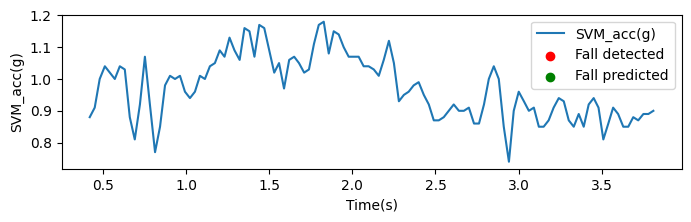

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 2/25
data_name:  Pick&Stand_S8_1
1/1 [==============================] - 0s 21ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[6]]


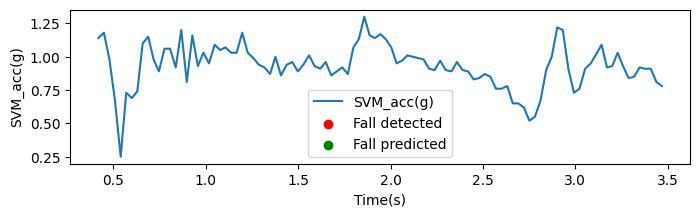

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 3/25
data_name:  Pick&Stand_S8_2
1/1 [==============================] - 0s 36ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[4]]


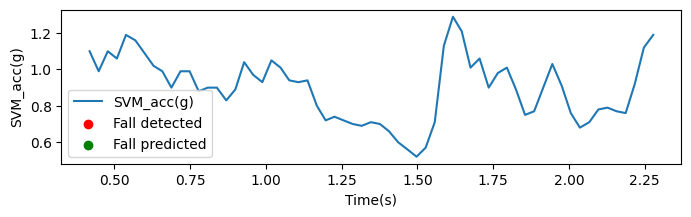

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 4/25
data_name:  Pick&Stand_S8_3
1/1 [==============================] - 0s 34ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[8]]


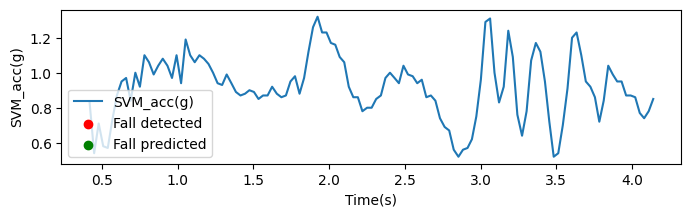

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 5/25
data_name:  Pick&Stand_S2_3
1/1 [==============================] - 0s 30ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[4]]


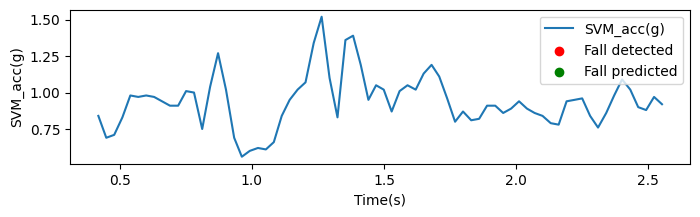

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 6/25
data_name:  Sitting&Stand_S7_2
1/1 [==============================] - 0s 34ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[8]]


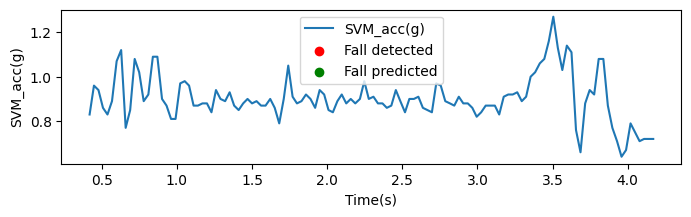

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 7/25
data_name:  Sitting&Stand_S7_3
1/1 [==============================] - 0s 31ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[6]]


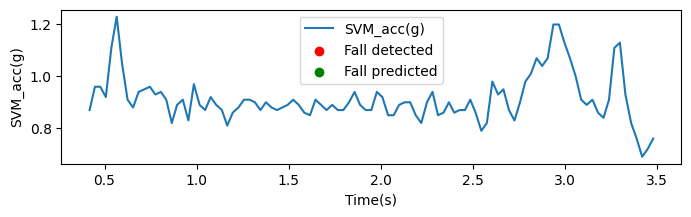

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 8/25
data_name:  Sitting&Stand_S8_1
1/1 [==============================] - 0s 38ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[13]]


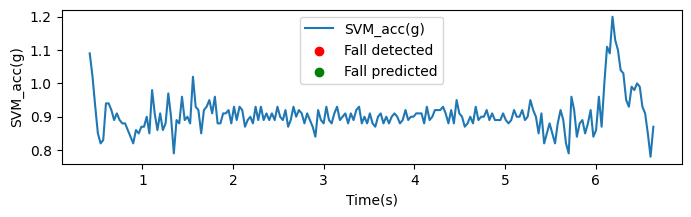

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 9/25
data_name:  Sitting&Stand_S8_2
1/1 [==============================] - 0s 34ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[7]]


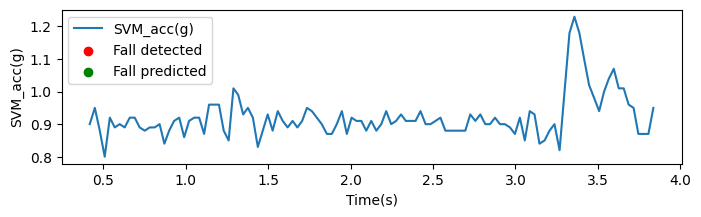

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 10/25
data_name:  Sitting&Stand_S8_3
1/1 [==============================] - 0s 32ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[8]]


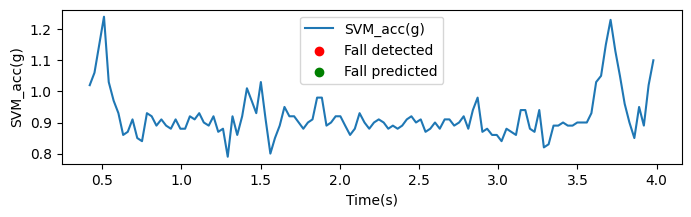

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 11/25
data_name:  Lying&Stand_S7_2
1/1 [==============================] - 0s 33ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[13]]


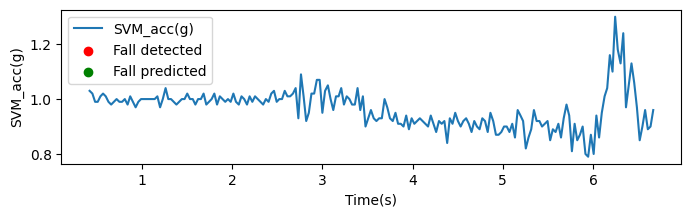

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 12/25
data_name:  Lying&Stand_S7_3
1/1 [==============================] - 0s 22ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

[[11]]


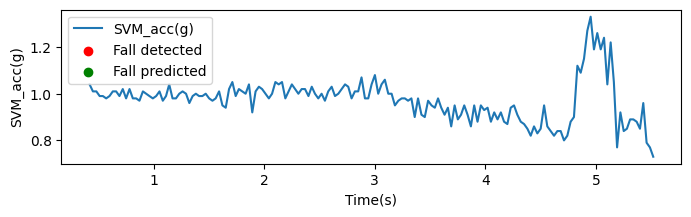

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 13/25
data_name:  Lying&Stand_S8_1
1/1 [==============================] - 0s 22ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[12]]


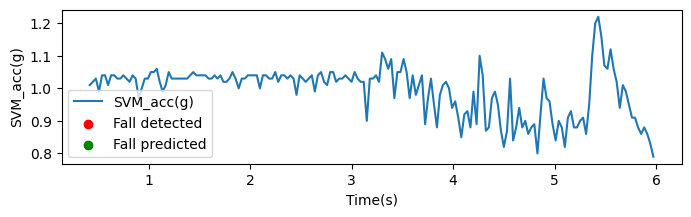

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 14/25
data_name:  Lying&Stand_S8_2
1/1 [==============================] - 0s 26ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

[[14]]


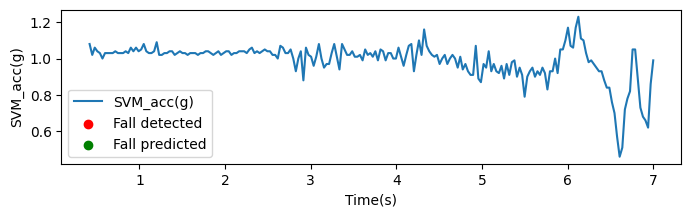

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 15/25
data_name:  Lying&Stand_S8_3
1/1 [==============================] - 0s 25ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[13]]


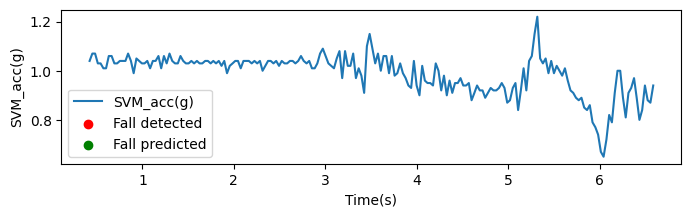

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 16/25
data_name:  StepUp&Down_S7_2
1/1 [==============================] - 0s 24ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[12]]


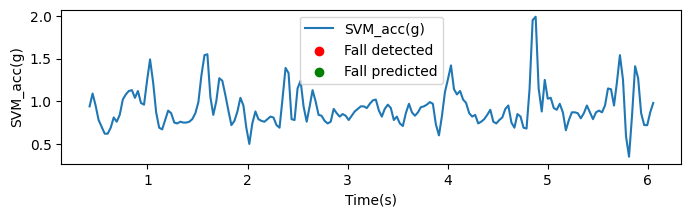

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 17/25
data_name:  StepUp&Down_S7_3
1/1 [==============================] - 0s 24ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[13]]


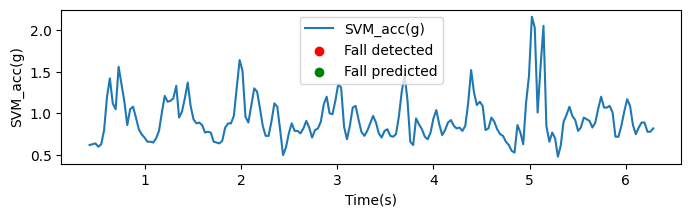

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 18/25
data_name:  StepUp&Down_S8_1
1/1 [==============================] - 0s 24ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

[[17]]


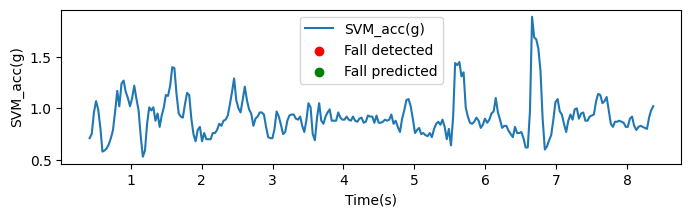

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 19/25
data_name:  StepUp&Down_S8_2
1/1 [==============================] - 0s 24ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[18]]


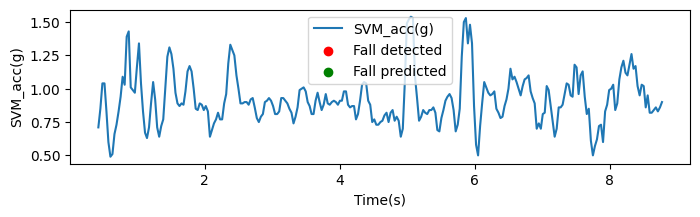

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 20/25
data_name:  StepUp&Down_S8_3
1/1 [==============================] - 0s 27ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[18]]


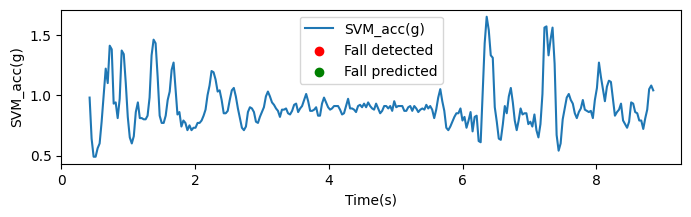

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 21/25
data_name:  Walk_S7_2
1/1 [==============================] - 0s 24ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[7]]


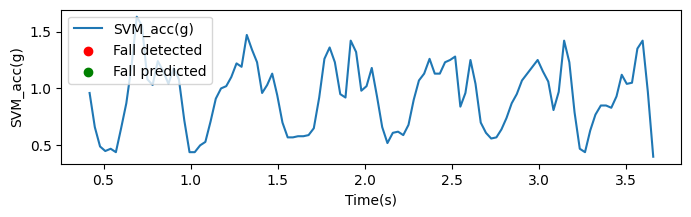

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 22/25
data_name:  Walk_S7_3
1/1 [==============================] - 0s 28ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[8]]


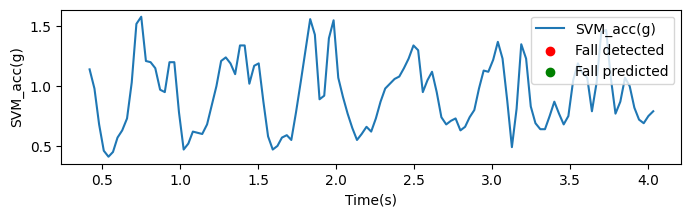

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 23/25
data_name:  Walk_S8_1
1/1 [==============================] - 0s 23ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[8]]


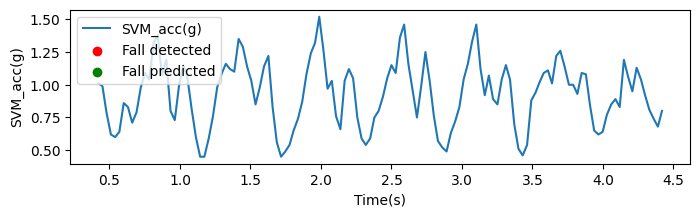

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 24/25
data_name:  Walk_S8_2
1/1 [==============================] - 0s 24ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[7]]


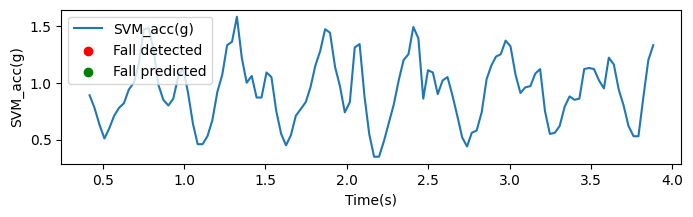

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 25/25
data_name:  Walk_S8_3
1/1 [==============================] - 0s 25ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[7]]


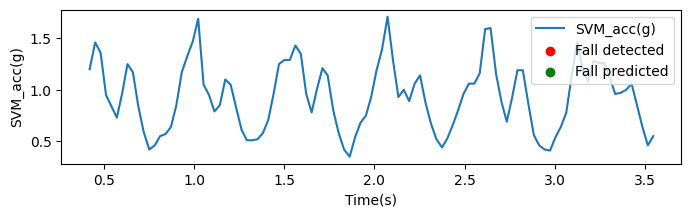

---------------------------------------------------------------------------------------------------- 

1.0


In [ ]:
## 비낙상데이터로 모델 테스트

# Evaluate the model incrementally on each test set
def expand_predictions(y_pred_classes, num_samples, time_steps):
    expanded_pred = np.repeat(y_pred_classes, time_steps)

    # If expanded_pred has fewer elements than num_samples, pad with zeros
    if len(expanded_pred) < num_samples:
        expanded_pred = np.pad(expanded_pred, (0, num_samples - len(expanded_pred)), 'constant', constant_values=0)

    return expanded_pred[:num_samples]

sum_acc_score=0
for i, df in enumerate(dfs_test_ADL):
    print(f"Evaluating on test dataset {i + 1}/{len(dfs_test_ADL)}")
    print('data_name: ', dfs_test_ADL_name[i])
    # Extract features and labels
    X_test = df.drop(columns=['Time(s)', 'label'])
    y_test = df['label']

    # Normalize features
    # scaler = StandardScaler()
    X_test_normalized = scaler.transform(X_test)

    # One-hot encode the labels
    encoder = OneHotEncoder(sparse_output=False)
    y_test_encoded = encoder.fit_transform(y_test.values.reshape(-1, 1))

    # Ensure the number of samples is divisible by time_steps
    num_test_samples = (X_test_normalized.shape[0] // time_steps) * time_steps

    X_test_final = X_test_normalized[:num_test_samples]
    y_test_final = y_test_encoded[:num_test_samples]

    # Reshape data for LSTM [samples, time steps, features]
    X_test_final = X_test_final.reshape((num_test_samples // time_steps, time_steps, X_test_final.shape[1]))
    y_test_final = y_test_final.reshape((num_test_samples // time_steps, time_steps, -1))[:, 0, :]

    # Evaluate the model
    # loss, accuracy = model.evaluate(X_test_final, y_test_final, verbose=1)
    # print(f'Test Accuracy on dataset {i + 1}: {accuracy}')

    # Evaluate the model
    y_pred = model.predict(X_test_final)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_final, axis=1)

    # Classification report and confusion matrix
    sum_acc_score+=accuracy_score(y_true, y_pred_classes)
    print(accuracy_score(y_true, y_pred_classes))
    print(classification_report(y_true, y_pred_classes))
    print(confusion_matrix(y_true, y_pred_classes))

    # Expand the predicted labels to match the original time steps
    expanded_y_pred_classes = expand_predictions(y_pred_classes, len(df), time_steps)

    temp_df=pd.DataFrame({'Time(s)':df['Time(s)'], 'SVM_acc(g)':df['SVM_acc(g)'], 'label':expanded_y_pred_classes})
    # Plot SVM_acc(g) with labels
    plt.figure(figsize=(8, 2))
    sns.lineplot(data=df, x='Time(s)', y='SVM_acc(g)', label='SVM_acc(g)')
    plt.scatter(df['Time(s)'][df['label'] == 1], df['SVM_acc(g)'][df['label'] == 1], color='red', label='Fall detected')
    plt.scatter(temp_df['Time(s)'][temp_df['label'] == 1], temp_df['SVM_acc(g)'][temp_df['label'] == 1], color='green', label='Fall predicted')
    plt.legend()
    plt.show()

    # Plot pitch and roll with labels
    # plt.figure(figsize=(8, 2))
    # sns.lineplot(data=df, x='Time(s)', y='pitch(deg)', label='Pitch(deg)')
    # sns.lineplot(data=df, x='Time(s)', y='roll(deg)', label='Roll(deg)')
    # plt.scatter(df['Time(s)'][df['label'] == 1], df['pitch(deg)'][df['label'] == 1], color='red', label='Fall detected (Pitch)')
    # plt.scatter(df['Time(s)'][df['label'] == 1], df['roll(deg)'][df['label'] == 1], color='red', label='Fall detected (Roll)')
    # plt.scatter(df['Time(s)'][temp_df['label'] == 1], df['pitch(deg)'][temp_df['label'] == 1], color='green', label='Fall predicted (Pitch)')
    # plt.scatter(df['Time(s)'][temp_df['label'] == 1], df['roll(deg)'][temp_df['label'] == 1], color='green', label='Fall predicted (Roll)')
    # plt.legend()
    # plt.show()

    print('-'*100, '\n')

avg_acc_score=sum_acc_score/len(dfs_test_ADL)
print(avg_acc_score)

In [30]:
# Save the model's architecture and weights
model.save('fall_recognition_gyro.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model

# Load the saved model
new_model = load_model('initial_model2.h5')

In [ ]:
new_model.save('initial_model3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
## 비낙상데이터 추가학습

In [ ]:
# Continue training the new_model with new data

for i, df in enumerate(dfs_train_ADL):
    print(f"Continuing training on dataset {i + 1}/{len(dfs_train_ADL)}")
    print('data_name: ', dfs_train_ADL_name[i])
    # Extract features and labels
    X = df.drop(columns=['Time(s)', 'label'])
    y = df['label']

    # Normalize features
    X_normalized = scaler.transform(X)

    # One-hot encode the labels
    encoder = OneHotEncoder(sparse_output=False)
    encoder.fit(np.random.choice([0, 1], size=117).reshape(-1, 1))
    y_encoded = encoder.transform(y.values.reshape(-1, 1))

    # Ensure the number of samples is divisible by time_steps
    num_samples = (X_normalized.shape[0] // time_steps) * time_steps

    X_final = X_normalized[:num_samples]
    y_final = y_encoded[:num_samples]

    # Reshape data for LSTM [samples, time steps, features]
    X_final = X_final.reshape((num_samples // time_steps, time_steps, X_final.shape[1]))
    y_final = y_final.reshape((num_samples // time_steps, time_steps, -1))[:, 0, :]

    # Continue training the new_model on the current dataset
    new_model.fit(X_final, y_final, epochs=epochs, batch_size=batch_size, verbose=1)


Continuing training on dataset 1/95
data_name:  Pick&Stand_S1_1
Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.0020 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 36ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 54ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 63ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 42ms/step - loss: 7.3442e-04 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 54ms/step - loss: 0.0371 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 41ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 43ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 50ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 50ms/st

Evaluating on test dataset 1/25
data_name:  Pick&Stand_S7_3
1/1 [==============================] - 1s 809ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[7]]


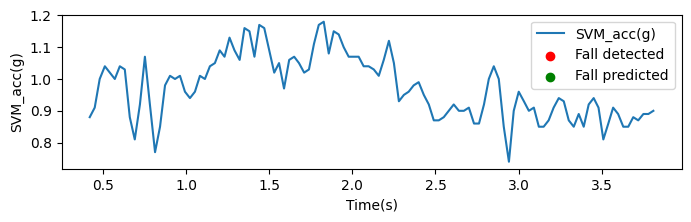

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 2/25
data_name:  Pick&Stand_S8_1
1/1 [==============================] - 0s 21ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[6]]


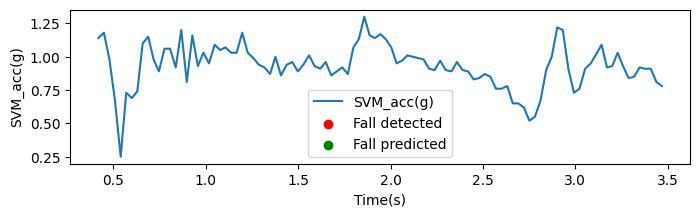

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 3/25
data_name:  Pick&Stand_S8_2
1/1 [==============================] - 0s 21ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[4]]


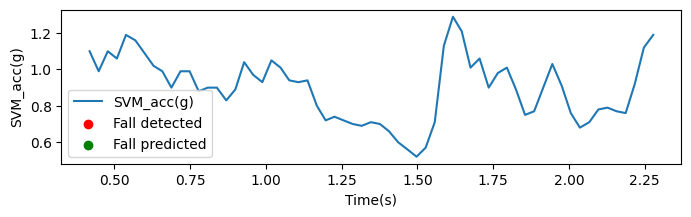

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 4/25
data_name:  Pick&Stand_S8_3
1/1 [==============================] - 0s 23ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[8]]


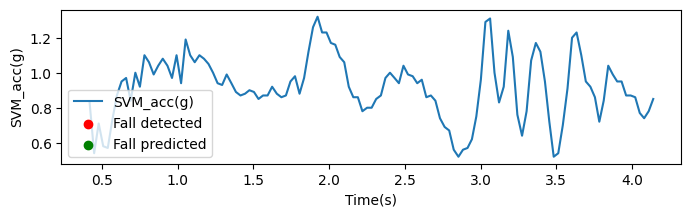

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 5/25
data_name:  Pick&Stand_S2_3
1/1 [==============================] - 0s 25ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[4]]


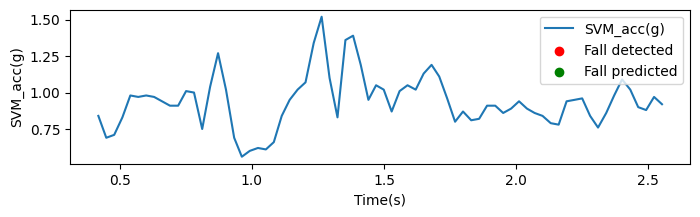

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 6/25
data_name:  Sitting&Stand_S7_2
1/1 [==============================] - 0s 20ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[8]]


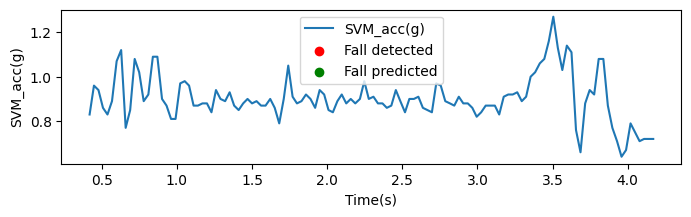

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 7/25
data_name:  Sitting&Stand_S7_3
1/1 [==============================] - 0s 21ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

[[6]]


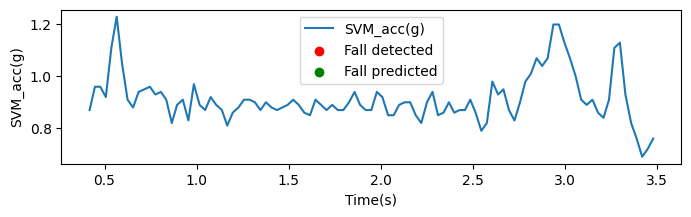

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 8/25
data_name:  Sitting&Stand_S8_1
1/1 [==============================] - 0s 22ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[13]]


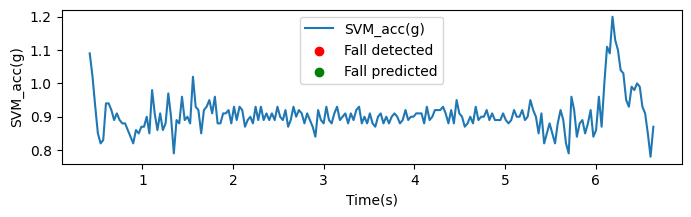

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 9/25
data_name:  Sitting&Stand_S8_2
1/1 [==============================] - 0s 21ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[7]]


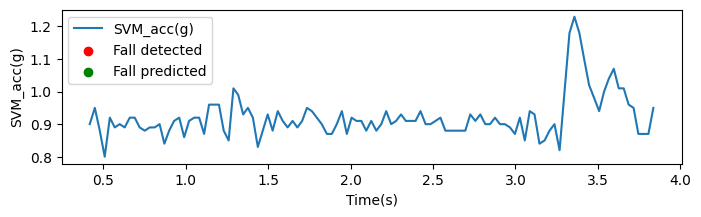

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 10/25
data_name:  Sitting&Stand_S8_3
1/1 [==============================] - 0s 21ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[8]]


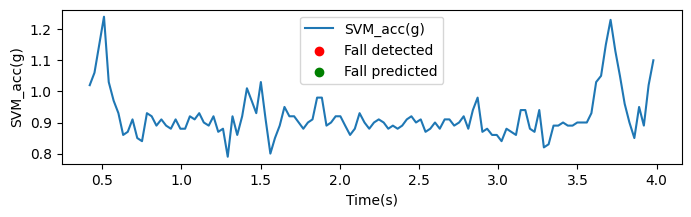

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 11/25
data_name:  Lying&Stand_S7_2
1/1 [==============================] - 0s 21ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[13]]


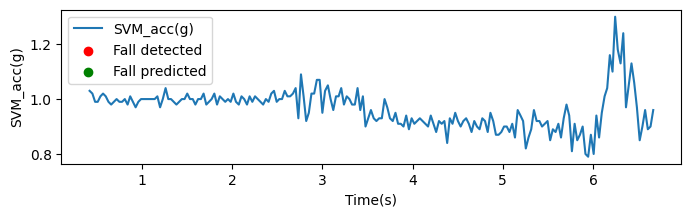

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 12/25
data_name:  Lying&Stand_S7_3
1/1 [==============================] - 0s 21ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

[[11]]


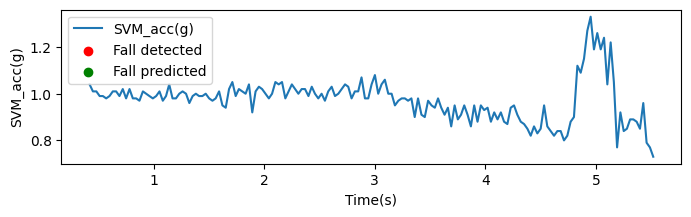

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 13/25
data_name:  Lying&Stand_S8_1
1/1 [==============================] - 0s 23ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[12]]


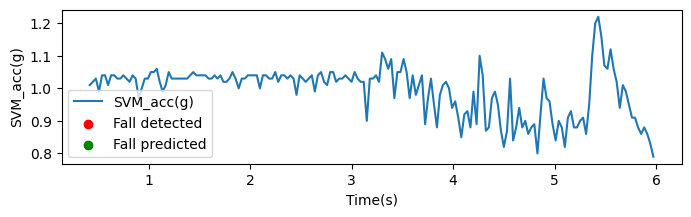

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 14/25
data_name:  Lying&Stand_S8_2
1/1 [==============================] - 0s 20ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

[[14]]


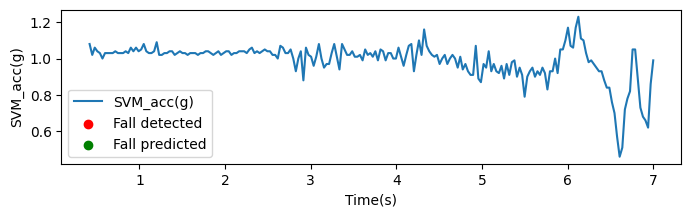

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 15/25
data_name:  Lying&Stand_S8_3
1/1 [==============================] - 0s 27ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[13]]


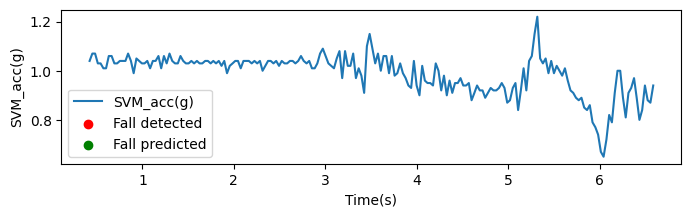

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 16/25
data_name:  StepUp&Down_S7_2
1/1 [==============================] - 0s 24ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

[[12]]


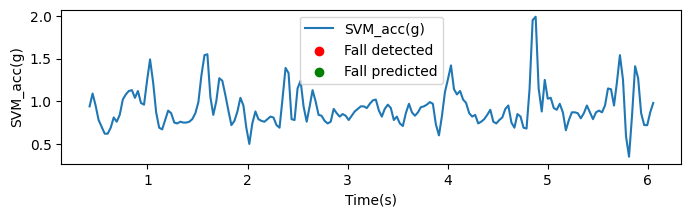

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 17/25
data_name:  StepUp&Down_S7_3
1/1 [==============================] - 0s 38ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[13]]


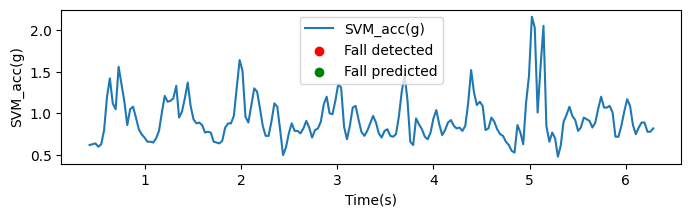

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 18/25
data_name:  StepUp&Down_S8_1
1/1 [==============================] - 0s 33ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

[[17]]


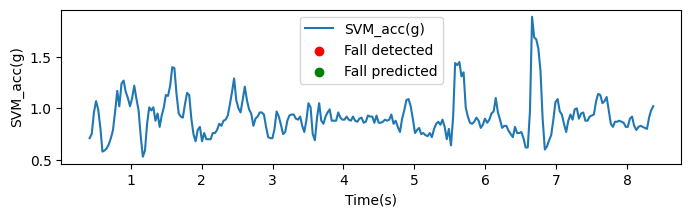

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 19/25
data_name:  StepUp&Down_S8_2
1/1 [==============================] - 0s 34ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[18]]


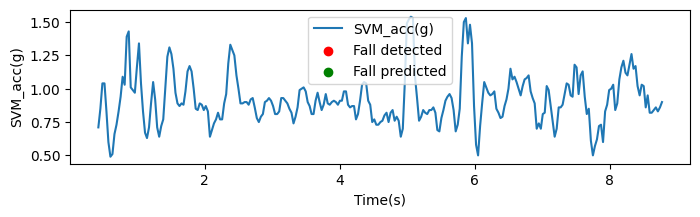

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 20/25
data_name:  StepUp&Down_S8_3
1/1 [==============================] - 0s 39ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[18]]


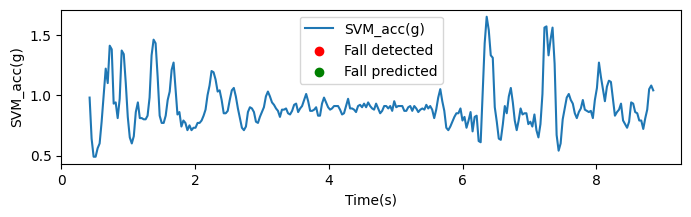

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 21/25
data_name:  Walk_S7_2
1/1 [==============================] - 0s 32ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[7]]


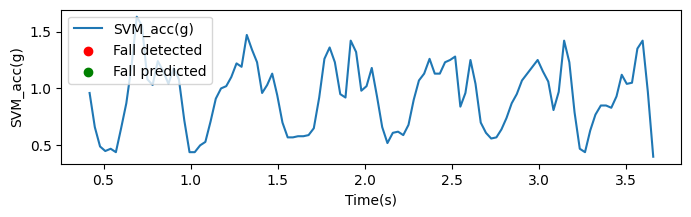

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 22/25
data_name:  Walk_S7_3
1/1 [==============================] - 0s 38ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[8]]


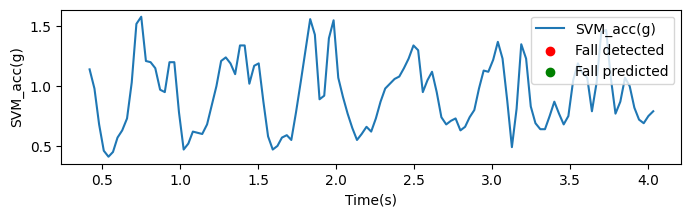

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 23/25
data_name:  Walk_S8_1
1/1 [==============================] - 0s 35ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[[8]]


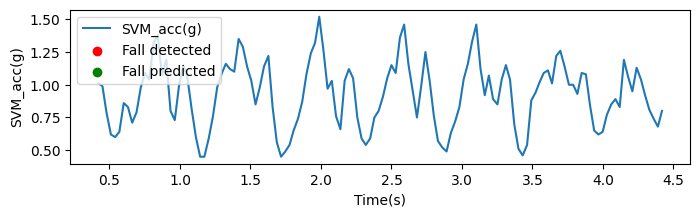

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 24/25
data_name:  Walk_S8_2
1/1 [==============================] - 0s 40ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[7]]


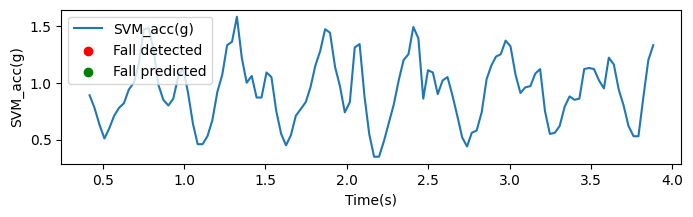

---------------------------------------------------------------------------------------------------- 

Evaluating on test dataset 25/25
data_name:  Walk_S8_3
1/1 [==============================] - 0s 43ms/step
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[7]]


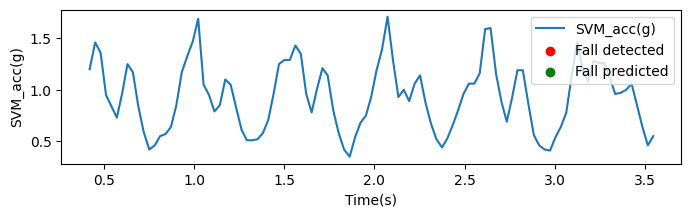

---------------------------------------------------------------------------------------------------- 

1.0


In [ ]:
## 비낙상 데이터로 테스트

# Evaluate the model incrementally on each test set
def expand_predictions(y_pred_classes, num_samples, time_steps):
    expanded_pred = np.repeat(y_pred_classes, time_steps)

    # If expanded_pred has fewer elements than num_samples, pad with zeros
    if len(expanded_pred) < num_samples:
        expanded_pred = np.pad(expanded_pred, (0, num_samples - len(expanded_pred)), 'constant', constant_values=0)

    return expanded_pred[:num_samples]

sum_acc_score=0
for i, df in enumerate(dfs_test_ADL):
    print(f"Evaluating on test dataset {i + 1}/{len(dfs_test_ADL)}")
    print('data_name: ', dfs_test_ADL_name[i])
    # Extract features and labels
    X_test = df.drop(columns=['Time(s)', 'label'])
    y_test = df['label']

    # Normalize features
    X_test_normalized = scaler.transform(X_test)

    # One-hot encode the labels
    encoder = OneHotEncoder(sparse_output=False)
    encoder.fit(np.random.choice([0, 1], size=117).reshape(-1, 1))
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

    # Ensure the number of samples is divisible by time_steps
    num_test_samples = (X_test_normalized.shape[0] // time_steps) * time_steps

    X_test_final = X_test_normalized[:num_test_samples]
    y_test_final = y_test_encoded[:num_test_samples]

    # Reshape data for LSTM [samples, time steps, features]
    X_test_final = X_test_final.reshape((num_test_samples // time_steps, time_steps, X_test_final.shape[1]))
    y_test_final = y_test_final.reshape((num_test_samples // time_steps, time_steps, -1))[:, 0, :]

    # Evaluate the model
    # loss, accuracy = model.evaluate(X_test_final, y_test_final, verbose=1)
    # print(f'Test Accuracy on dataset {i + 1}: {accuracy}')

    # Evaluate the model
    y_pred = new_model.predict(X_test_final)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_final, axis=1)

    # Classification report and confusion matrix
    sum_acc_score+=accuracy_score(y_true, y_pred_classes)
    print(accuracy_score(y_true, y_pred_classes))
    print(classification_report(y_true, y_pred_classes))
    print(confusion_matrix(y_true, y_pred_classes))

    # Expand the predicted labels to match the original time steps
    expanded_y_pred_classes = expand_predictions(y_pred_classes, len(df), time_steps)

    temp_df=pd.DataFrame({'Time(s)':df['Time(s)'], 'SVM_acc(g)':df['SVM_acc(g)'], 'label':expanded_y_pred_classes})
    # Plot SVM_acc(g) with labels
    plt.figure(figsize=(8, 2))
    sns.lineplot(data=df, x='Time(s)', y='SVM_acc(g)', label='SVM_acc(g)')
    plt.scatter(df['Time(s)'][df['label'] == 1], df['SVM_acc(g)'][df['label'] == 1], color='red', label='Fall detected')
    plt.scatter(temp_df['Time(s)'][temp_df['label'] == 1], temp_df['SVM_acc(g)'][temp_df['label'] == 1], color='green', label='Fall predicted')
    plt.legend()
    plt.show()

    # Plot pitch and roll with labels
    # plt.figure(figsize=(8, 2))
    # sns.lineplot(data=df, x='Time(s)', y='pitch(deg)', label='Pitch(deg)')
    # sns.lineplot(data=df, x='Time(s)', y='roll(deg)', label='Roll(deg)')
    # plt.scatter(df['Time(s)'][df['label'] == 1], df['pitch(deg)'][df['label'] == 1], color='red', label='Fall detected (Pitch)')
    # plt.scatter(df['Time(s)'][df['label'] == 1], df['roll(deg)'][df['label'] == 1], color='red', label='Fall detected (Roll)')
    # plt.scatter(df['Time(s)'][temp_df['label'] == 1], df['pitch(deg)'][temp_df['label'] == 1], color='green', label='Fall predicted (Pitch)')
    # plt.scatter(df['Time(s)'][temp_df['label'] == 1], df['roll(deg)'][temp_df['label'] == 1], color='green', label='Fall predicted (Roll)')
    # plt.legend()
    # plt.show()

    print('-'*100, '\n')

avg_acc_score=sum_acc_score/len(dfs_test_ADL)
print(avg_acc_score)

In [ ]:
## 낙상 데이터로 테스트

# Evaluate the model incrementally on each test set
def expand_predictions(y_pred_classes, num_samples, time_steps):
    expanded_pred = np.repeat(y_pred_classes, time_steps)

    # If expanded_pred has fewer elements than num_samples, pad with zeros
    if len(expanded_pred) < num_samples:
        expanded_pred = np.pad(expanded_pred, (0, num_samples - len(expanded_pred)), 'constant', constant_values=0)

    return expanded_pred[:num_samples]

sum_acc_score=0
for i, df in enumerate(dfs_test):
    print(f"Evaluating on test dataset {i + 1}/{len(dfs_test)}")
    print('data_name: ', dfs_test_name[i])
    # Extract features and labels
    X_test = df.drop(columns=['Time(s)', 'label'])
    y_test = df['label']

    # Normalize features
    X_test_normalized = scaler.transform(X_test)

    # One-hot encode the labels
    encoder = OneHotEncoder(sparse_output=False)
    y_test_encoded = encoder.fit_transform(y_test.values.reshape(-1, 1))

    # Ensure the number of samples is divisible by time_steps
    num_test_samples = (X_test_normalized.shape[0] // time_steps) * time_steps

    X_test_final = X_test_normalized[:num_test_samples]
    y_test_final = y_test_encoded[:num_test_samples]

    # Reshape data for LSTM [samples, time steps, features]
    X_test_final = X_test_final.reshape((num_test_samples // time_steps, time_steps, X_test_final.shape[1]))
    y_test_final = y_test_final.reshape((num_test_samples // time_steps, time_steps, -1))[:, 0, :]

    # Evaluate the model
    # loss, accuracy = model.evaluate(X_test_final, y_test_final, verbose=1)
    # print(f'Test Accuracy on dataset {i + 1}: {accuracy}')

    # Evaluate the model
    y_pred = new_model.predict(X_test_final)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_final, axis=1)

    # Classification report and confusion matrix
    sum_acc_score+=accuracy_score(y_true, y_pred_classes)
    print(accuracy_score(y_true, y_pred_classes))
    print(classification_report(y_true, y_pred_classes))
    print(confusion_matrix(y_true, y_pred_classes))

    # Expand the predicted labels to match the original time steps
    expanded_y_pred_classes = expand_predictions(y_pred_classes, len(df), time_steps)

    temp_df=pd.DataFrame({'Time(s)':df['Time(s)'], 'SVM_acc(g)':df['SVM_acc(g)'], 'label':expanded_y_pred_classes})
    # Plot SVM_acc(g) with labels
    plt.figure(figsize=(8, 2))
    sns.lineplot(data=df, x='Time(s)', y='SVM_acc(g)', label='SVM_acc(g)')
    plt.scatter(df['Time(s)'][df['label'] == 1], df['SVM_acc(g)'][df['label'] == 1], color='red', label='Fall detected')
    plt.scatter(temp_df['Time(s)'][temp_df['label'] == 1], temp_df['SVM_acc(g)'][temp_df['label'] == 1], color='green', label='Fall predicted')
    plt.legend()
    plt.show()

    # Plot pitch and roll with labels
    # plt.figure(figsize=(8, 2))
    # sns.lineplot(data=df, x='Time(s)', y='pitch(deg)', label='Pitch(deg)')
    # sns.lineplot(data=df, x='Time(s)', y='roll(deg)', label='Roll(deg)')
    # plt.scatter(df['Time(s)'][df['label'] == 1], df['pitch(deg)'][df['label'] == 1], color='red', label='Fall detected (Pitch)')
    # plt.scatter(df['Time(s)'][df['label'] == 1], df['roll(deg)'][df['label'] == 1], color='red', label='Fall detected (Roll)')
    # plt.scatter(df['Time(s)'][temp_df['label'] == 1], df['pitch(deg)'][temp_df['label'] == 1], color='green', label='Fall predicted (Pitch)')
    # plt.scatter(df['Time(s)'][temp_df['label'] == 1], df['roll(deg)'][temp_df['label'] == 1], color='green', label='Fall predicted (Roll)')
    # plt.legend()
    # plt.show()

    print('-'*100, '\n')

avg_acc_score=sum_acc_score/len(dfs_test)
print(avg_acc_score)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.metrics import *

In [ ]:
dfs_train_concat=pd.concat(dfs_train, axis=0)
dfs_train_concat.drop(columns=['Time(s)', 'label'], inplace=True)

In [ ]:
dfs_train_concat.shape

(71275, 7)

In [ ]:
scaler = StandardScaler()
scaler.fit(dfs_train_concat)  # Reshape if needed

StandardScaler()

In [ ]:
## 랜덤포레스트

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

for i, df in enumerate(dfs_train):
    print(f"Continuing training on dataset {i + 1}/{len(dfs_train)}")
    print('data_name: ', dfs_train_name[i])
    X = df.drop(columns=['Time(s)', 'label'])
    Y = df['label']

    X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, shuffle=True)

    # Normalize features

    X_train_normalized = scaler.transform(X_train)  # Reshape if needed
    X_test_normalized = scaler.transform(X_test)  # Reshape if needed

    rf_model.fit(X_train_normalized, y_train)  # Use np.argmax to get the original class labels
    y_pred = rf_model.predict(X_test_normalized)

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    print('-'*100, '\n')


Continuing training on dataset 1/251
data_name:  Syncope_S1_1
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.50      1.00      0.67         3

    accuracy                           0.94        49
   macro avg       0.75      0.97      0.82        49
weighted avg       0.97      0.94      0.95        49

[[43  3]
 [ 0  3]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 2/251
data_name:  Syncope_S1_2
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.83      0.91         6

    accuracy                           0.99       113
   macro avg       1.00      0.92      0.95       113
weighted avg       0.99      0.99      0.99       113

[[107   0]
 [  1   5]]
-----------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       0.00      0.00      0.00         2

    accuracy                           0.95        37
   macro avg       0.47      0.50      0.49        37
weighted avg       0.89      0.95      0.92        37

[[35  0]
 [ 2  0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 7/251
data_name:  Syncope_S3_1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00         4

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[41  0]
 [ 0  4]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 8/251
dat

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       0.00      0.00      0.00         3

    accuracy                           0.91        33
   macro avg       0.45      0.50      0.48        33
weighted avg       0.83      0.91      0.87        33

[[30  0]
 [ 3  0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 15/251
data_name:  Syncope_S5_3
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.75      0.86         4

    accuracy                           0.98        43
   macro avg       0.99      0.88      0.92        43
weighted avg       0.98      0.98      0.98        43

[[39  0]
 [ 1  3]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 16/251
d

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        70
           1       0.29      1.00      0.44         2

    accuracy                           0.93        72
   macro avg       0.64      0.96      0.70        72
weighted avg       0.98      0.93      0.95        72

[[65  5]
 [ 0  2]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 109/251
data_name:  LateralRight_Lying_S4_1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

[[68]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 110/251
data_name:  LateralRight_Lying_S4_2
              prec

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.71      1.00      0.83         5

    accuracy                           0.97        67
   macro avg       0.86      0.98      0.91        67
weighted avg       0.98      0.97      0.97        67

[[60  2]
 [ 0  5]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 151/251
data_name:  LateralLeft_LyingRecovery_S5_2
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.00      0.00      0.00         1

    accuracy                           0.98        54
   macro avg       0.49      0.50      0.50        54
weighted avg       0.96      0.98      0.97        54

[[53  0]
 [ 1  0]]
---------------------------------------------------------------------------------------------------- 

Continuing training 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.88      0.88      0.88         8

    accuracy                           0.93        29
   macro avg       0.91      0.91      0.91        29
weighted avg       0.93      0.93      0.93        29

[[20  1]
 [ 1  7]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 153/251
data_name:  LateralLeft_LyingRecovery_S6_1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00         3

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

[[46  0]
 [ 0  3]]
---------------------------------------------------------------------------------------------------- 

Continuing training 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.00      0.00      0.00         0

    accuracy                           0.99        72
   macro avg       0.50      0.49      0.50        72
weighted avg       1.00      0.99      0.99        72

[[71  1]
 [ 0  0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 172/251
data_name:  LateralLeft_Lying_S6_1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00         2

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

[[66  0]
 [ 0  2]]
---------------------------------------------------------------------------------------------------- 

Continuing training on datas

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.00      0.00      0.00         0

    accuracy                           0.99        68
   macro avg       0.50      0.49      0.50        68
weighted avg       1.00      0.99      0.99        68

[[67  1]
 [ 0  0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 174/251
data_name:  LateralLeft_Lying_S6_3
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.67      0.80         3

    accuracy                           0.99        74
   macro avg       0.99      0.83      0.90        74
weighted avg       0.99      0.99      0.99        74

[[71  0]
 [ 1  2]]
---------------------------------------------------------------------------------------------------- 

Continuing training on datas

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       0.00      0.00      0.00         3

    accuracy                           0.95        56
   macro avg       0.47      0.50      0.49        56
weighted avg       0.90      0.95      0.92        56

[[53  0]
 [ 3  0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 232/251
data_name:  Forward_Lying_S7_1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00         1

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62

[[61  0]
 [ 0  1]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 2

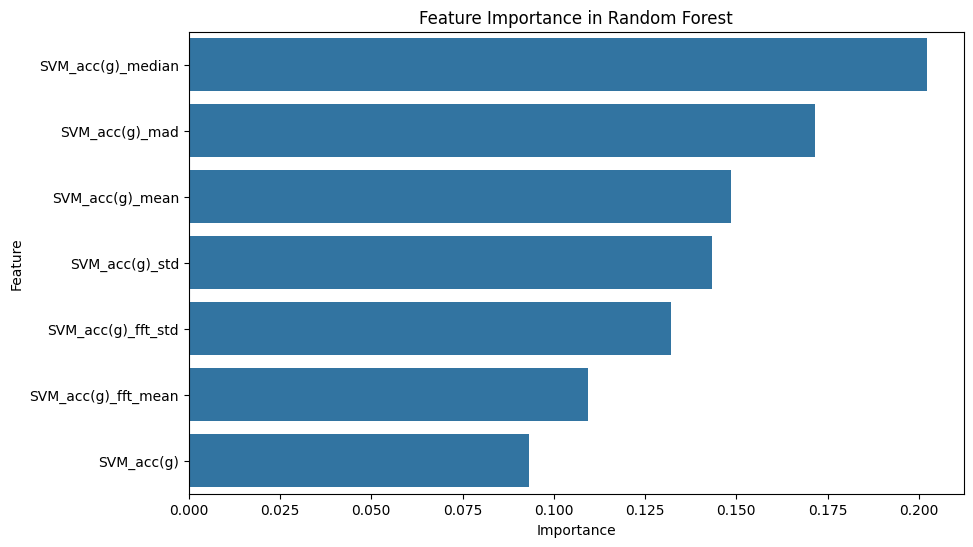

In [ ]:
feature_names = X_train.columns

importances = rf_model.feature_importances_
# Create a DataFrame for the feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
sum_acc_score=0

for i, df in enumerate(dfs_test):
    print(f"Continuing training on dataset {i + 1}/{len(dfs_test)}")
    print('data_name: ', dfs_test_name[i])
    X_test = df.drop(columns=['Time(s)', 'label'])
    y_test = df['label']

    X_test_normalized = scaler.transform(X_test)  # Reshape if needed

    y_pred = rf_model.predict(X_test_normalized)

    sum_acc_score+=accuracy_score(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    print('-'*100, '\n')

avg_acc_score=sum_acc_score/len(dfs_test)
print(avg_acc_score)

Continuing training on dataset 1/66
data_name:  Syncope_S7_2
0.9085714285714286
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       158
           1       1.00      0.06      0.11        17

    accuracy                           0.91       175
   macro avg       0.95      0.53      0.53       175
weighted avg       0.92      0.91      0.87       175

[[158   0]
 [ 16   1]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 2/66
data_name:  Syncope_S8_1
0.922077922077922
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       214
           1       0.47      0.53      0.50        17

    accuracy                           0.92       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.93      0.92      0.92       231

[[204  10]
 [  8   9]]
--------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8949579831932774
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       221
           1       0.38      0.71      0.49        17

    accuracy                           0.89       238
   macro avg       0.68      0.81      0.72       238
weighted avg       0.93      0.89      0.91       238

[[201  20]
 [  5  12]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 51/66
data_name:  Forward_LyingRecovery_S8_3
0.8240740740740741
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        91
           1       0.00      0.00      0.00        17

    accuracy                           0.82       108
   macro avg       0.42      0.49      0.45       108
weighted avg       0.71      0.82      0.76       108

[[89  2]
 [17  0]]
---------------------------------------------------------------------------------------

In [ ]:
sum_acc_score=0

for i, df in enumerate(dfs_test_ADL):
    print(f"Continuing training on dataset {i + 1}/{len(dfs_test_ADL)}")
    print('data_name: ', dfs_test_name[i])
    X_test = df.drop(columns=['Time(s)', 'label'])
    y_test = df['label']

    X_test_normalized = scaler.transform(X_test)  # Reshape if needed

    y_pred = rf_model.predict(X_test_normalized)

    sum_acc_score+=accuracy_score(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    print('-'*100, '\n')

avg_acc_score=sum_acc_score/len(dfs_test_ADL)
print(avg_acc_score)

Continuing training on dataset 1/25
data_name:  Syncope_S7_2
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[114]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 2/25
data_name:  Syncope_S8_1
0.9320388349514563
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       103
           1       0.00      0.00      0.00         0

    accuracy                           0.93       103
   macro avg       0.50      0.47      0.48       103
weighted avg       1.00      0.93      0.96       103

[[96  7]
 [ 0  0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

[[72]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 6/25
data_name:  Backward_LyingRecovery_S7_2
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

[[126]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 7/25
data_name:  Backward_LyingRecovery_S7_3
1.0
              precision    recall  f1-score   support

           0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206

[[206]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 16/25
data_name:  Backward_LateralPosition_S8_1 (1)
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188

[[188]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 17/25
data_name:  Backward_LateralPosition_S8_1
0.9693877551020408
              precision    recall  f1-score   s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       266
           1       0.00      0.00      0.00         0

    accuracy                           0.99       266
   macro avg       0.50      0.50      0.50       266
weighted avg       1.00      0.99      1.00       266

[[264   2]
 [  0   0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 19/25
data_name:  Backward_LateralPosition_S8_3 (1)
0.982078853046595
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       279
           1       0.00      0.00      0.00         0

    accuracy                           0.98       279
   macro avg       0.50      0.49      0.50       279
weighted avg       1.00      0.98      0.99       279

[[274   5]
 [  0   0]]
------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

df=dfs_train[0]
X = df.drop(columns=['Time(s)', 'label'])
Y = df['label']

X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, shuffle=True)

# Normalize features

X_train_normalized = scaler.transform(X_train)  # Reshape if needed
X_test_normalized = scaler.transform(X_test)  # Reshape if needed

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_normalized, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Use the best parameters to create a new model
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:

best_params = {
'max_depth': None,
'max_features': 'sqrt',  # Adjusted due to deprecation of 'auto'
'min_samples_leaf': 1,
'min_samples_split': 2,
'n_estimators': 30,
'random_state': 42  # Ensuring reproducibility
}

# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)

for i, df in enumerate(dfs_train):
    print(f"Continuing training on dataset {i + 1}/{len(dfs_train)}")
    print('data_name: ', dfs_train_name[i])
    X = df.drop(columns=['Time(s)', 'label'])
    Y = df['label']

    X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, shuffle=True)

    # Normalize features

    X_train_normalized = scaler.transform(X_train)  # Reshape if needed
    X_test_normalized = scaler.transform(X_test)  # Reshape if needed


    # Fit the model on the training data
    best_rf_model.fit(X_train_normalized, y_train)

    # Predict on the test data
    y_pred = best_rf_model.predict(X_test_normalized)

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    print('-'*100, '\n')


Continuing training on dataset 1/251
data_name:  Syncope_S1_1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00         4

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

[[45  0]
 [ 0  4]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 2/251
data_name:  Syncope_S1_2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00         5

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113

[[108   0]
 [  0   5]]
-----------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       0.00      0.00      0.00         2

    accuracy                           0.97        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.93      0.97      0.95        60

[[58  0]
 [ 2  0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 51/251
data_name:  Backward_Sitting_S5_1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00         2

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

[[47  0]
 [ 0  2]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00         4

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

[[74  0]
 [ 0  4]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 102/251
data_name:  LateralRight_Lying_S1_3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         1

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76

[[75  0]
 [ 0  1]]
---------------------------------------------------------------------------------------------------- 

Continuing training on data

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.00      0.00      0.00         0

    accuracy                           0.99        67
   macro avg       0.50      0.49      0.50        67
weighted avg       1.00      0.99      0.99        67

[[66  1]
 [ 0  0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 246/251
data_name:  Forward_KneeLying_S5_2
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.80      0.80      0.80         5

    accuracy                           0.97        64
   macro avg       0.89      0.89      0.89        64
weighted avg       0.97      0.97      0.97        64

[[58  1]
 [ 1  4]]
---------------------------------------------------------------------------------------------------- 

Continuing training on datas

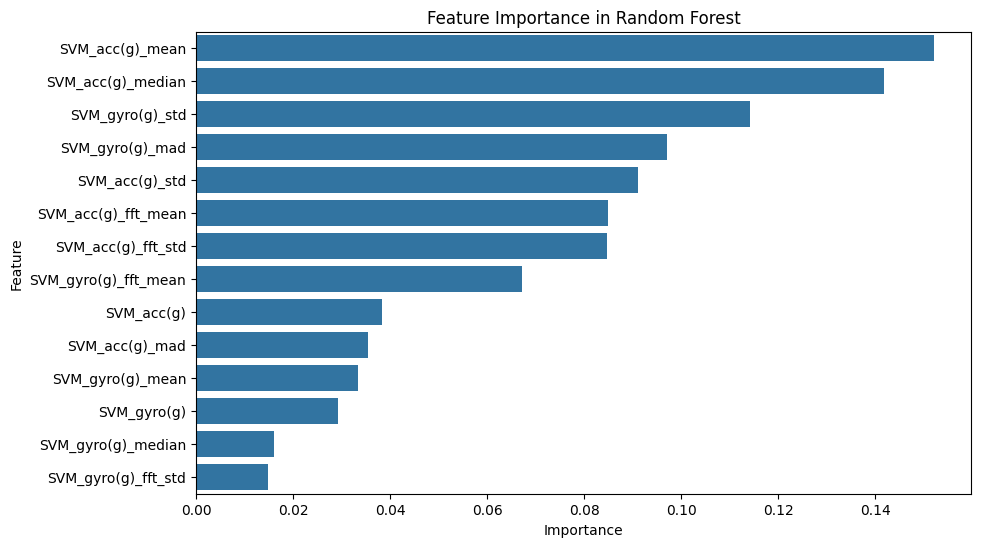

In [ ]:
feature_names = X_train.columns

importances = best_rf_model.feature_importances_
# Create a DataFrame for the feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
sum_acc_score=0

for i, df in enumerate(dfs_test):
    print(f"Continuing training on dataset {i + 1}/{len(dfs_test)}")
    print('data_name: ', dfs_test_name[i])
    X_test = df.drop(columns=['Time(s)', 'label'])
    y_test = df['label']

    X_test_normalized = scaler.transform(X_test)  # Reshape if needed

    y_pred = best_rf_model.predict(X_test_normalized)

    sum_acc_score+=accuracy_score(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    print('-'*100, '\n')

avg_acc_score=sum_acc_score/len(dfs_test)
print(avg_acc_score)



Continuing training on dataset 1/66
data_name:  Syncope_S7_2
0.8914285714285715
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       158
           1       0.00      0.00      0.00        17

    accuracy                           0.89       175
   macro avg       0.45      0.49      0.47       175
weighted avg       0.81      0.89      0.85       175

[[156   2]
 [ 17   0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 2/66
data_name:  Syncope_S8_1
0.9177489177489178
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       214
           1       0.45      0.53      0.49        17

    accuracy                           0.92       231
   macro avg       0.71      0.74      0.72       231
weighted avg       0.92      0.92      0.92       231

[[203  11]
 [  8   9]]
-------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



[[304   1]
 [  8   9]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 30/66
data_name:  LateralRight_Lying_S8_2
0.9576547231270358
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       290
           1       1.00      0.24      0.38        17

    accuracy                           0.96       307
   macro avg       0.98      0.62      0.68       307
weighted avg       0.96      0.96      0.95       307

[[290   0]
 [ 13   4]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 31/66
data_name:  LateralRight_Lying_S8_3
0.9697885196374623
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       314
           1       1.00      0.41      0.58        17

    accuracy                           0.97       331
   macro avg      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9415204678362573
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       325
           1       0.33      0.18      0.23        17

    accuracy                           0.94       342
   macro avg       0.65      0.58      0.60       342
weighted avg       0.93      0.94      0.93       342

[[319   6]
 [ 14   3]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 53/66
data_name:  Forward_LateralPosition_S7_3
0.9552238805970149
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       318
           1       0.56      0.53      0.55        17

    accuracy                           0.96       335
   macro avg       0.77      0.75      0.76       335
weighted avg       0.95      0.96      0.95       335

[[311   7]
 [  8   9]]
---------------------------------------------------------------------------------

In [ ]:
sum_acc_score=0

for i, df in enumerate(dfs_test_ADL):
    print(f"Continuing training on dataset {i + 1}/{len(dfs_test_ADL)}")
    print('data_name: ', dfs_test_name[i])
    X_test = df.drop(columns=['Time(s)', 'label'])
    y_test = df['label']

    X_test_normalized = scaler.transform(X_test)  # Reshape if needed

    y_pred = rf_model.predict(X_test_normalized)

    sum_acc_score+=accuracy_score(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    print('-'*100, '\n')

avg_acc_score=sum_acc_score/len(dfs_test_ADL)
print(avg_acc_score)

Continuing training on dataset 1/25
data_name:  Syncope_S7_2
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[114]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 2/25
data_name:  Syncope_S8_1
0.941747572815534
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       103
           1       0.00      0.00      0.00         0

    accuracy                           0.94       103
   macro avg       0.50      0.47      0.48       103
weighted avg       1.00      0.94      0.97       103

[[97  6]
 [ 0  0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       125
           1       0.00      0.00      0.00         0

    accuracy                           0.90       125
   macro avg       0.50      0.45      0.47       125
weighted avg       1.00      0.90      0.95       125

[[113  12]
 [  0   0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 5/25
data_name:  Syncope_S8_3
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

[[72]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 6/25
data_name:  Backward_LyingRecovery_S7_2
1.0
              preci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188

[[188]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 17/25
data_name:  Backward_LateralPosition_S8_1
0.9642857142857143
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       196
           1       0.00      0.00      0.00         0

    accuracy                           0.96       196
   macro avg       0.50      0.48      0.49       196
weighted avg       1.00      0.96      0.98       196

[[189   7]
 [  0   0]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 18/25
data_name:  Backward_Lateral

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109

[[109]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 22/25
data_name:  Backward_Lying_S7_2
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121

[[121]]
---------------------------------------------------------------------------------------------------- 

Continuing training on dataset 23/25
data_name:  Backward_Lying_S7_3
1.0
              precision    recall  f1-score   support

           0       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-64-e7ff8bf35532>:33: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies, fft_magnitude, use_line_collection=True)


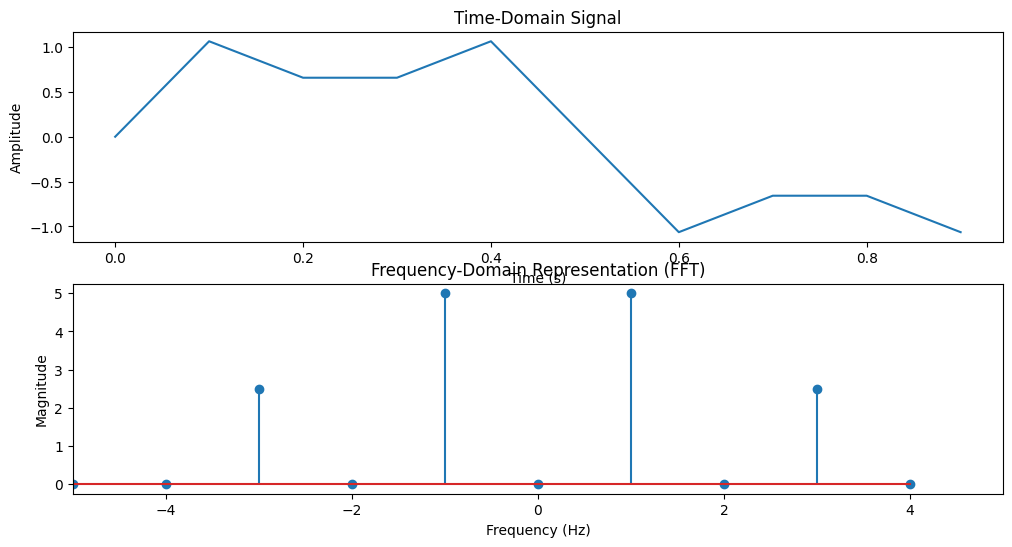

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
10
[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]
FFT Values (Complex Numbers):
[ 8.88178420e-16-0.0000000e+00j -6.31826037e-16-5.0000000e+00j
 -3.67374686e-16-4.4408921e-16j  1.87736827e-16-2.5000000e+00j
  7.00441593e-16+4.4408921e-16j -6.66133815e-16-0.0000000e+00j
  7.00441593e-16-4.4408921e-16j  1.87736827e-16+2.5000000e+00j
 -3.67374686e-16+4.4408921e-16j -6.31826037e-16+5.0000000e+00j]

FFT Magnitudes:
[8.88178420e-16 5.00000000e+00 5.76350055e-16 2.50000000e+00
 8.29357373e-16 6.66133815e-16 8.29357373e-16 2.50000000e+00
 5.76350055e-16 5.00000000e+00]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Parameters
f1 = 1  # Frequency of the first sine wave
f2 = 3  # Frequency of the second sine wave
fs = 10  # Sampling rate
T = 1  # Duration in seconds
t = np.linspace(0, T, T * fs, endpoint=False)  # Time vector

# Signal: sum of two sine waves
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Compute FFT
fft_values = fft(signal)
n = len(signal)
frequencies = np.fft.fftfreq(n, 1 / fs)

# Compute magnitudes
fft_magnitude = np.abs(fft_values)

# Plot the time-domain signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Time-Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the frequency-domain representation
plt.subplot(2, 1, 2)
plt.stem(frequencies, fft_magnitude, use_line_collection=True)
plt.title('Frequency-Domain Representation (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-fs/2, fs/2)  # Display frequencies from -fs/2 to fs/2
plt.show()

print(t)
print(n)
print(frequencies)
# Print the FFT values and magnitudes
print("FFT Values (Complex Numbers):")
print(fft_values)
print("\nFFT Magnitudes:")
print(fft_magnitude)
